In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import statsmodels.api as sm

from datetime import date
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import mean_absolute_error
from sklego.preprocessing import RepeatingBasisFunction

%matplotlib inline

In [2]:
!pip install sklego

  Obtaining dependency information for sklego from https://files.pythonhosted.org/packages/c7/dc/d25da2d106a07371d4d0caa0490e7def5c9f4c0eb259e86cd51c6124bb51/sklego-0.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for scikit-lego from https://files.pythonhosted.org/packages/8d/e7/9b78f6e118eaf69256b7d5fdad01403247e66b794f2b0164941429728535/scikit_lego-0.9.4-py2.py3-none-any.whl.metadata
  Obtaining dependency information for narwhals>=1.5.0 from https://files.pythonhosted.org/packages/ee/f6/1fcd6b3d0e21d9b75e71ae68fbc92bbb9b9b1f4f33dd81c61d8f53378b30/narwhals-1.29.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/225.0 kB ? eta -:--:--
   ---------- ----------------------------- 61.4/225.0 kB 1.1 MB/s eta 0:00:01
   ------------------------------ --------- 174.1/225.0 kB 1.7 MB/s eta 0:00:01
   -------------------------------------- - 215.0/225.0 kB 1.9 MB/s eta 0:00:01
   -------------------------------------- - 215.0/225.0 kB 1.9 MB/s eta

# Удаление дубликатов в данных

In [2]:
data = pd.DataFrame({"k1": ["one", "two"] * 3 + ["two"], "k2": [1, 1, 2, 3, 3, 4, 4],
                     "k3": [1, 1, 2, 3, 3, 4, 4], "k4":[1, 1, 1, 1, 1, 1, 1]})
data

k1  k2  k3  k4
0  one   1   1   1
1  two   1   1   1
2  one   2   2   1
3  two   3   3   1
4  one   3   3   1
5  two   4   4   1
6  two   4   4   1

In [3]:
data.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

In [4]:
data.drop_duplicates()

k1  k2  k3  k4
0  one   1   1   1
1  two   1   1   1
2  one   2   2   1
3  two   3   3   1
4  one   3   3   1
5  two   4   4   1

In [5]:
data.T.drop_duplicates().T

k1 k2 k4
0  one  1  1
1  two  1  1
2  one  2  1
3  two  3  1
4  one  3  1
5  two  4  1
6  two  4  1

In [6]:
data.drop(data.columns[data.nunique() == 1], axis=1)

k1  k2  k3
0  one   1   1
1  two   1   1
2  one   2   2
3  two   3   3
4  one   3   3
5  two   4   4
6  two   4   4

# Заполнение пропусков в данных

Nan - маркер отсутствия данных.

In [7]:
float_data = pd.Series([1.2, -3.5, np.nan, 0])
float_data

0    1.2
1   -3.5
2    NaN
3    0.0
dtype: float64

In [8]:
float_data.isna()

0    False
1    False
2     True
3    False
dtype: bool

In [9]:
float_data.notna()

0     True
1     True
2    False
3     True
dtype: bool

Удаление данных с пропусками

In [10]:
data = pd.DataFrame([[1., 6.5, 3., np.nan], [1., np.nan, np.nan, np.nan], [np.nan, np.nan, np.nan, np.nan],
                     [np.nan, 6.5, 3., np.nan]])
data

0    1    2   3
0  1.0  6.5  3.0 NaN
1  1.0  NaN  NaN NaN
2  NaN  NaN  NaN NaN
3  NaN  6.5  3.0 NaN

In [11]:
data.dropna()

Empty DataFrame
Columns: [0, 1, 2, 3]
Index: []

In [12]:
data.dropna(how="all")

0    1    2   3
0  1.0  6.5  3.0 NaN
1  1.0  NaN  NaN NaN
3  NaN  6.5  3.0 NaN

In [13]:
data.dropna(axis="columns", how="all")

0    1    2
0  1.0  6.5  3.0
1  1.0  NaN  NaN
2  NaN  NaN  NaN
3  NaN  6.5  3.0

In [14]:
data.dropna(thresh=2)

0    1    2   3
0  1.0  6.5  3.0 NaN
3  NaN  6.5  3.0 NaN

Восполнение отсутствующих данных

In [15]:
df = pd.DataFrame(np.random.standard_normal((7, 3)))
df.iloc[:4, 1] = np.nan
df.iloc[:2, 2] = np.nan
df

0         1         2
0  0.593196       NaN       NaN
1  0.543822       NaN       NaN
2  2.076917       NaN -1.969323
3  0.409402       NaN -2.285062
4  0.051488 -1.272613  0.502008
5  0.048122 -0.822025 -0.806596
6 -0.271618  1.077981  1.150588

In [16]:
df.fillna(0)

0         1         2
0  0.593196  0.000000  0.000000
1  0.543822  0.000000  0.000000
2  2.076917  0.000000 -1.969323
3  0.409402  0.000000 -2.285062
4  0.051488 -1.272613  0.502008
5  0.048122 -0.822025 -0.806596
6 -0.271618  1.077981  1.150588

In [17]:
df.fillna({1: 0.5, 2: 0})

0         1         2
0  0.593196  0.500000  0.000000
1  0.543822  0.500000  0.000000
2  2.076917  0.500000 -1.969323
3  0.409402  0.500000 -2.285062
4  0.051488 -1.272613  0.502008
5  0.048122 -0.822025 -0.806596
6 -0.271618  1.077981  1.150588

In [18]:
df.fillna(method="bfill")

0         1         2
0  0.593196 -1.272613 -1.969323
1  0.543822 -1.272613 -1.969323
2  2.076917 -1.272613 -1.969323
3  0.409402 -1.272613 -2.285062
4  0.051488 -1.272613  0.502008
5  0.048122 -0.822025 -0.806596
6 -0.271618  1.077981  1.150588

In [19]:
df.fillna(method="bfill", limit=2)

0         1         2
0  0.593196       NaN -1.969323
1  0.543822       NaN -1.969323
2  2.076917 -1.272613 -1.969323
3  0.409402 -1.272613 -2.285062
4  0.051488 -1.272613  0.502008
5  0.048122 -0.822025 -0.806596
6 -0.271618  1.077981  1.150588

In [20]:
df.fillna(df.mean())

0         1         2
0  0.593196 -0.338886 -0.681677
1  0.543822 -0.338886 -0.681677
2  2.076917 -0.338886 -1.969323
3  0.409402 -0.338886 -2.285062
4  0.051488 -1.272613  0.502008
5  0.048122 -0.822025 -0.806596
6 -0.271618  1.077981  1.150588

In [21]:
df.fillna(df.median())

0         1         2
0  0.593196 -0.822025 -0.806596
1  0.543822 -0.822025 -0.806596
2  2.076917 -0.822025 -1.969323
3  0.409402 -0.822025 -2.285062
4  0.051488 -1.272613  0.502008
5  0.048122 -0.822025 -0.806596
6 -0.271618  1.077981  1.150588

Медиана более устойчива к выбросам

In [22]:
data_all = []
for i in range(10000):
    data = []
    for i in range(1000):
        if np.random.random() >= 0.90:
            data.append(np.random.normal(1, 1, 1)[0])
        else:
            data.append(np.random.normal(1, 10, 1)[0])
    data_all.append(data)

data_all = np.array(data_all)

<Axes: >

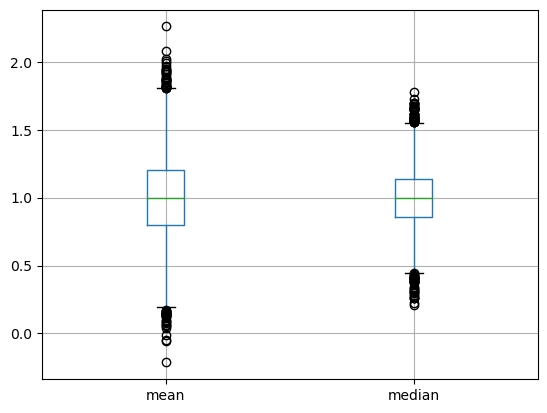

In [23]:
res = pd.DataFrame({"mean": data_all.mean(axis=1), "median": np.median(data_all, axis=1)})
res.boxplot()

Создание дополнительного признака

In [24]:
df["2 is nan"] = df[2].isna().astype(np.int32)
df

0         1         2  2 is nan
0  0.593196       NaN       NaN         1
1  0.543822       NaN       NaN         1
2  2.076917       NaN -1.969323         0
3  0.409402       NaN -2.285062         0
4  0.051488 -1.272613  0.502008         0
5  0.048122 -0.822025 -0.806596         0
6 -0.271618  1.077981  1.150588         0

Замена значений

In [25]:
data = pd.Series([1., -999., 2., -999., 4., 3.])
data

0      1.0
1   -999.0
2      2.0
3   -999.0
4      4.0
5      3.0
dtype: float64

In [26]:
data.replace(-999, np.nan)

0    1.0
1    NaN
2    2.0
3    NaN
4    4.0
5    3.0
dtype: float64

# Кодирование признаков

Бинарные факторы: False == 0, True == 1

In [27]:
data = pd.Series(["male"]*10 + ["female"]*5)
data

0       male
1       male
2       male
3       male
4       male
5       male
6       male
7       male
8       male
9       male
10    female
11    female
12    female
13    female
14    female
dtype: object

In [28]:
(data == "male").astype(np.int32)

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    0
11    0
12    0
13    0
14    0
dtype: int32

Категориальные факторы: разбиваем по порядку


In [29]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

df = pd.DataFrame(["moscow", "spb", "moscow", "spb", "spb", "spb", "tomsk", "novgorod", "samara", "saratov"])
df

0
0    moscow
1       spb
2    moscow
3       spb
4       spb
5       spb
6     tomsk
7  novgorod
8    samara
9   saratov

In [30]:
enc = OrdinalEncoder()
enc.fit_transform(df)

array([[0.],
       [4.],
       [0.],
       [4.],
       [4.],
       [4.],
       [5.],
       [1.],
       [2.],
       [3.]])

In [31]:
enc = OrdinalEncoder()
enc.fit_transform(df)

array([[0.],
       [4.],
       [0.],
       [4.],
       [4.],
       [4.],
       [5.],
       [1.],
       [2.],
       [3.]])

Категориальные факторы: разбиваем на много бинарных (one hot encoding)

city_is_moscow: 0/1, city_is_spb: 0/1, city_is_tomsk: 0/1 ...

In [32]:
ohe = OneHotEncoder()
ohe.fit(df)
ohe.categories_

[array(['moscow', 'novgorod', 'samara', 'saratov', 'spb', 'tomsk'],
       dtype=object)]

In [33]:
pd.DataFrame(ohe.transform(df).toarray(), columns=ohe.categories_)

moscow novgorod samara saratov  spb tomsk
0    1.0      0.0    0.0     0.0  0.0   0.0
1    0.0      0.0    0.0     0.0  1.0   0.0
2    1.0      0.0    0.0     0.0  0.0   0.0
3    0.0      0.0    0.0     0.0  1.0   0.0
4    0.0      0.0    0.0     0.0  1.0   0.0
5    0.0      0.0    0.0     0.0  1.0   0.0
6    0.0      0.0    0.0     0.0  0.0   1.0
7    0.0      1.0    0.0     0.0  0.0   0.0
8    0.0      0.0    1.0     0.0  0.0   0.0
9    0.0      0.0    0.0     1.0  0.0   0.0

In [34]:
pd.get_dummies(df)

0_moscow  0_novgorod  0_samara  0_saratov  0_spb  0_tomsk
0         1           0         0          0      0        0
1         0           0         0          0      1        0
2         1           0         0          0      0        0
3         0           0         0          0      1        0
4         0           0         0          0      1        0
5         0           0         0          0      1        0
6         0           0         0          0      0        1
7         0           1         0          0      0        0
8         0           0         1          0      0        0
9         0           0         0          1      0        0

Цикличные факторы: время дня => позиция на циферблате => sin, cos угла

# Работа со временем

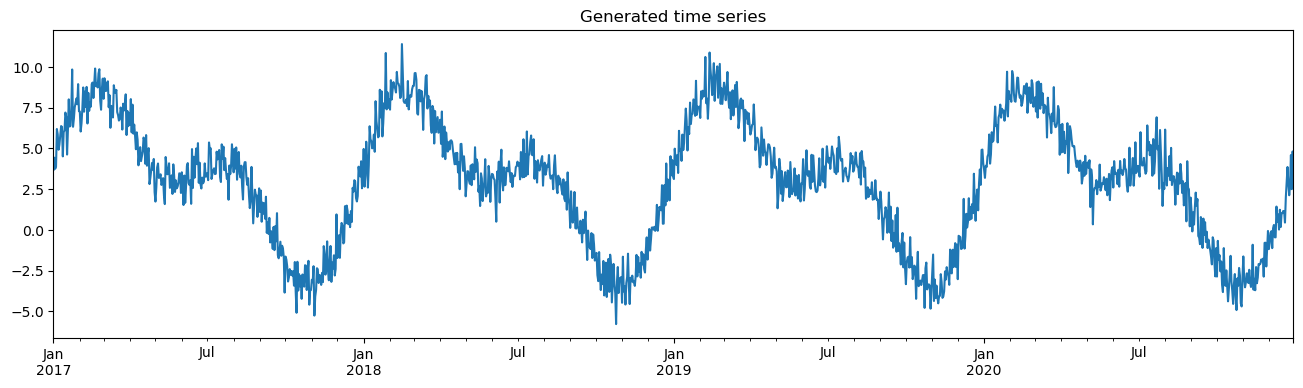

In [35]:
np.random.seed(12345)

range_of_dates = pd.date_range(start="2017-01-01", end="2020-12-30")
X = pd.DataFrame(index=range_of_dates)

X["day_nr"] = range(len(X))
X["day_of_year"] = X.index.day_of_year

signal_1 = 3 + 4 * np.sin(X["day_nr"] / 365 * 2 * np.pi)
signal_2 = 3 * np.sin(X["day_nr"] / 365 * 4 * np.pi + 365/2)
noise = np.random.normal(0, 0.85, len(X))

y = signal_1 + signal_2 + noise

y.plot(figsize=(16,4), title="Generated time series");

In [36]:
X

day_nr  day_of_year
2017-01-01       0            1
2017-01-02       1            2
2017-01-03       2            3
2017-01-04       3            4
2017-01-05       4            5
...            ...          ...
2020-12-26    1455          361
2020-12-27    1456          362
2020-12-28    1457          363
2020-12-29    1458          364
2020-12-30    1459          365

[1460 rows x 2 columns]

In [37]:
results_df = y.to_frame()
results_df.columns = ["actuals"]

In [38]:
TRAIN_END = 3 * 365

## Подход 1 - категориальные переменные

In [39]:
X_1 = pd.DataFrame(data=pd.get_dummies(X.index.month, drop_first=True, prefix="month"))
X_1.index = X.index
X_1

month_2  month_3  month_4  month_5  month_6  month_7  month_8  \
2017-01-01        0        0        0        0        0        0        0   
2017-01-02        0        0        0        0        0        0        0   
2017-01-03        0        0        0        0        0        0        0   
2017-01-04        0        0        0        0        0        0        0   
2017-01-05        0        0        0        0        0        0        0   
...             ...      ...      ...      ...      ...      ...      ...   
2020-12-26        0        0        0        0        0        0        0   
2020-12-27        0        0        0        0        0        0        0   
2020-12-28        0        0        0        0        0        0        0   
2020-12-29        0        0        0        0        0        0        0   
2020-12-30        0        0        0        0        0        0        0   

            month_9  month_10  month_11  month_12  
2017-01-01        0         0         0         0  
2017-01-02        0         0         0         0  
2017-01-03        0         0         0         0  
2017-01-04        0         0         0         0  
2017-01-05        0         0         0         0  
...             ...       ...       ...       ...  
2020-12-26        0         0         0         1  
2020-12-27        0         0         0         1  
2020-12-28        0         0         0         1  
2020-12-29        0         0         0         1  
2020-12-30        0         0         0         1  

[1460 rows x 11 columns]

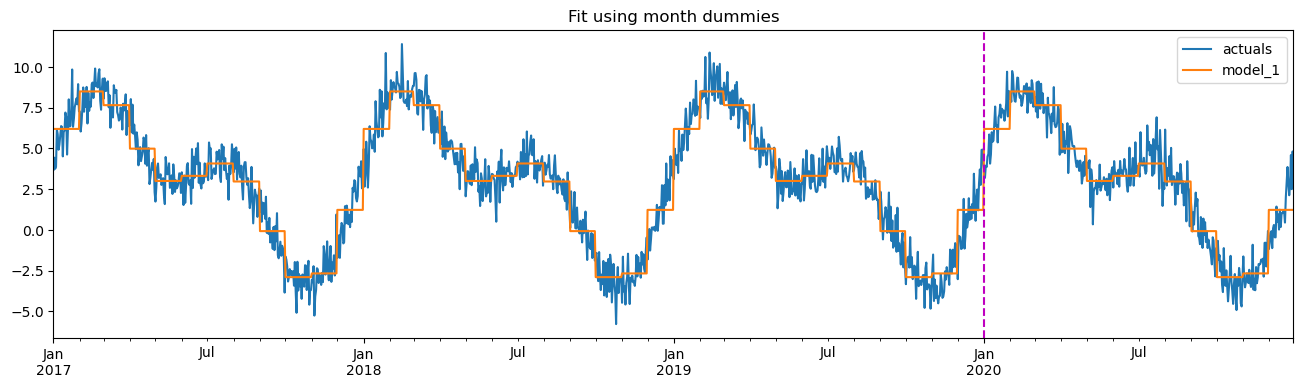

In [40]:
model_1 = LinearRegression().fit(X_1.iloc[:TRAIN_END], y.iloc[:TRAIN_END])

results_df["model_1"] = model_1.predict(X_1)
results_df[["actuals", "model_1"]].plot(figsize=(16,4), title="Fit using month dummies")

plt.axvline(date(2020, 1, 1), c="m", linestyle="--");

In [41]:
print(model_1.score(X_1.iloc[:TRAIN_END], y.iloc[:TRAIN_END]))
print(model_1.score(X_1.iloc[TRAIN_END + 1:], y.iloc[TRAIN_END + 1:]))

0.9032966594007233
0.9013303218307307


## Подход 2 - циклическое кодирование с синусом/косинусом

In [42]:
def sin_transformer(period):
 return FunctionTransformer(lambda x: np.sin(x / period * 2 * np.pi))

def cos_transformer(period):
 return FunctionTransformer(lambda x: np.cos(x / period * 2 * np.pi))

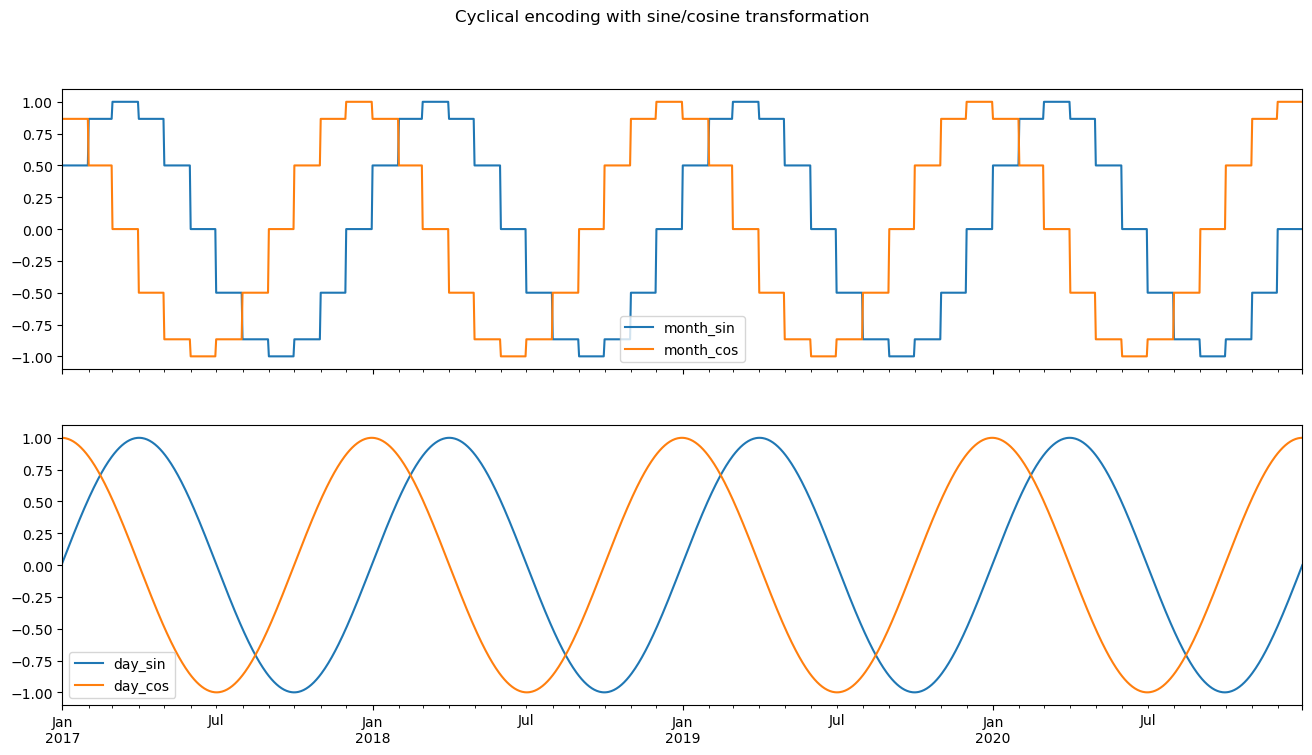

In [43]:
X_2 = X.copy()
X_2["month"] = X_2.index.month

X_2["month_sin"] = sin_transformer(12).fit_transform(X_2)["month"]
X_2["month_cos"] = cos_transformer(12).fit_transform(X_2)["month"]

X_2["day_sin"] = sin_transformer(365).fit_transform(X_2)["day_of_year"]
X_2["day_cos"] = cos_transformer(365).fit_transform(X_2)["day_of_year"]

fig, ax = plt.subplots(2, 1, sharex=True, figsize=(16,8))
X_2[["month_sin", "month_cos"]].plot(ax=ax[0])
X_2[["day_sin", "day_cos"]].plot(ax=ax[1])
plt.suptitle("Cyclical encoding with sine/cosine transformation");

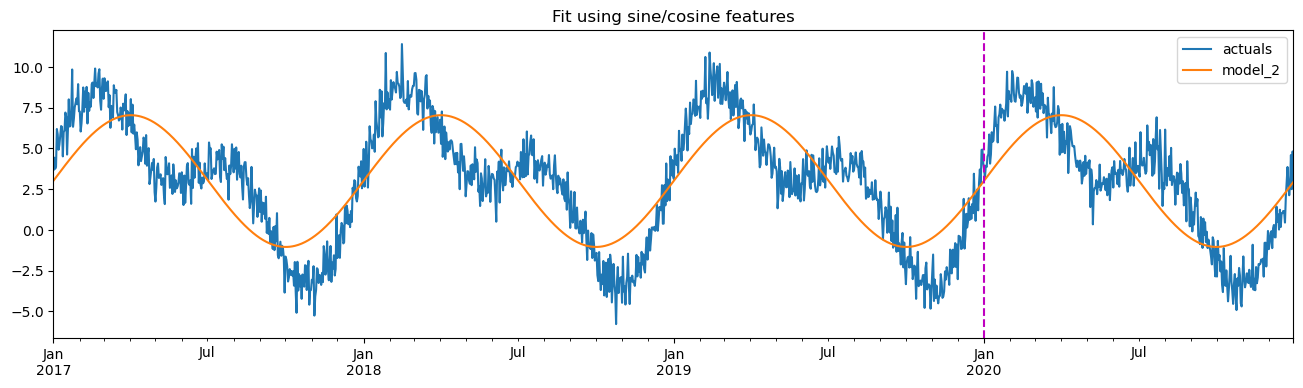

In [44]:
X_2_daily = X_2[["day_sin", "day_cos"]]

model_2 = LinearRegression().fit(X_2_daily.iloc[:TRAIN_END],
 y.iloc[:TRAIN_END])

results_df["model_2"] = model_2.predict(X_2_daily)
results_df[["actuals", "model_2"]].plot(figsize=(16,4),
 title="Fit using sine/cosine features")
plt.axvline(date(2020, 1, 1), c="m", linestyle="--");

In [45]:
print(model_2.score(X_2_daily.iloc[:TRAIN_END], y.iloc[:TRAIN_END]))
print(model_2.score(X_2_daily.iloc[TRAIN_END + 1:], y.iloc[TRAIN_END + 1:]))

0.6100625066720329
0.5899965166638506


In [46]:
X_concat = pd.concat([X_1, X_2_daily], axis=1)

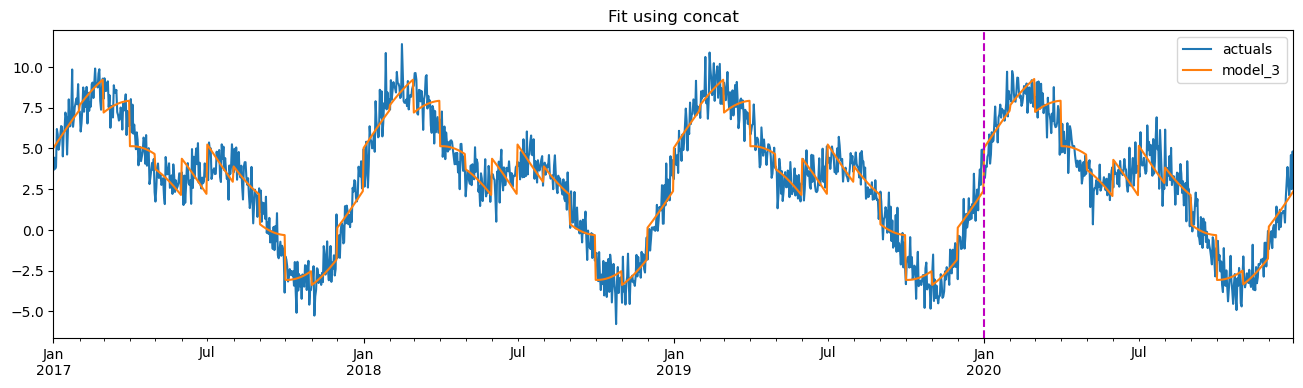

In [47]:
model_concat = LinearRegression().fit(X_concat.iloc[:TRAIN_END], y.iloc[:TRAIN_END])

results_df["model_3"] = model_concat.predict(X_concat)
results_df[["actuals", "model_3"]].plot(figsize=(16,4), title="Fit using concat")
plt.axvline(date(2020, 1, 1), c="m", linestyle="--");

In [48]:
print(model_concat.score(X_concat.iloc[:TRAIN_END], y.iloc[:TRAIN_END]))
print(model_concat.score(X_concat.iloc[TRAIN_END + 1:], y.iloc[TRAIN_END + 1:]))

0.9211414853927441
0.9145793856126097


## Подход 3 - радиальные базисные функции

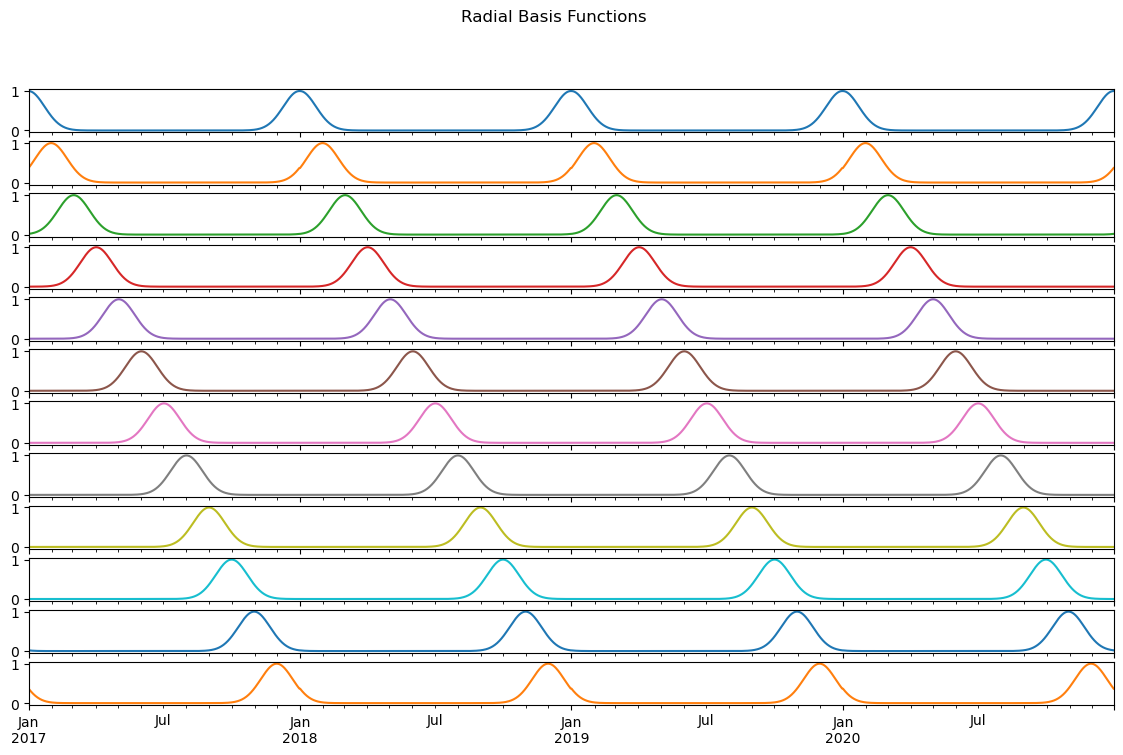

In [49]:
rbf = RepeatingBasisFunction(n_periods=12,
                             column="day_of_year",
                             input_range=(1,365),
                             remainder="drop")
rbf.fit(X)
X_3 = pd.DataFrame(index=X.index, data=rbf.transform(X))

X_3.plot(subplots=True, figsize=(14, 8), sharex=True,
         title="Radial Basis Functions", legend=False);

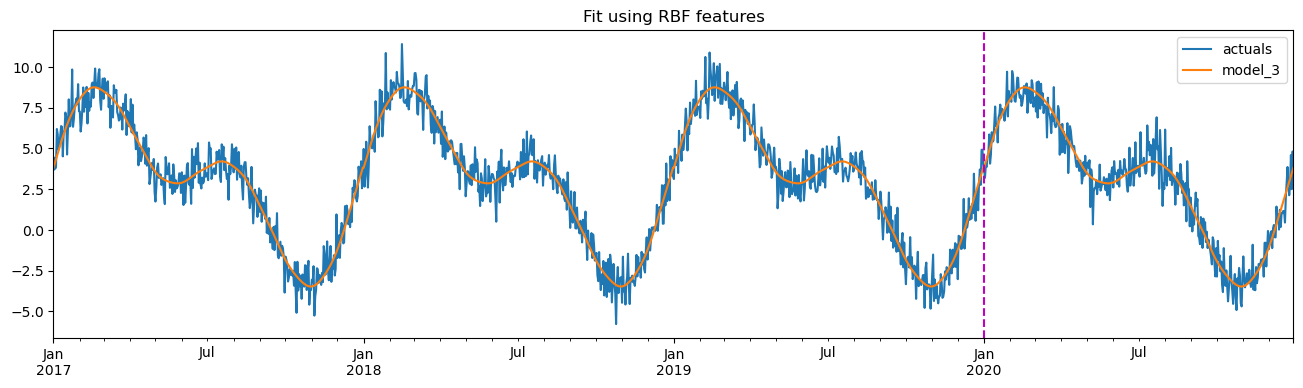

In [50]:
model_3 = LinearRegression().fit(X_3.iloc[:TRAIN_END],
                                 y.iloc[:TRAIN_END])

results_df["model_3"] = model_3.predict(X_3)
results_df[["actuals", "model_3"]].plot(figsize=(16,4),
                                        title="Fit using RBF features")
plt.axvline(date(2020, 1, 1), c="m", linestyle="--");

In [51]:
print(model_3.score(X_3.iloc[:TRAIN_END], y.iloc[:TRAIN_END]))
print(model_3.score(X_3.iloc[TRAIN_END + 1:], y.iloc[TRAIN_END + 1:]))

0.948396987578611
0.9459626423586667


# Создание новых признаков

Полиномиальные признаки

In [52]:
from sklearn.preprocessing import PolynomialFeatures

In [53]:
X = np.arange(6).reshape(3, 2)
X

array([[0, 1],
       [2, 3],
       [4, 5]])

In [54]:
poly = PolynomialFeatures(2)
poly.fit_transform(X)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

Другие преобразования: sin x, ln x

Дискретизация и группировка по интервалам

array([[<Axes: title={'center': '0'}>]], dtype=object)

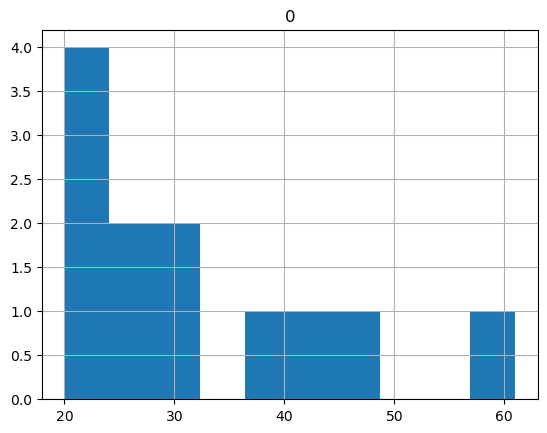

In [55]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]
pd.DataFrame(ages).hist()

In [56]:
bins = [18, 25, 35, 60, 100]
age_categories = pd.cut(ages, bins)
age_categories

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64, right]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [57]:
age_categories.codes

array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

# Преобразование данных

Приведение к единой шкале: StandardScaler, MinMaxScaler

In [58]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]
scaler = MinMaxScaler()
scaler.fit_transform(data)

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [1.  , 1.  ]])

In [59]:
scaler = StandardScaler()
scaler.fit_transform(data)

array([[-1.18321596, -1.18321596],
       [-0.50709255, -0.50709255],
       [ 0.16903085,  0.16903085],
       [ 1.52127766,  1.52127766]])

Логарифмирование, преобразование Бокса-Кокса

C:\Users\mirwo\AppData\Local\Temp\ipykernel_19540\645094770.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, hist= False, kde= True)


<Axes: ylabel='Density'>

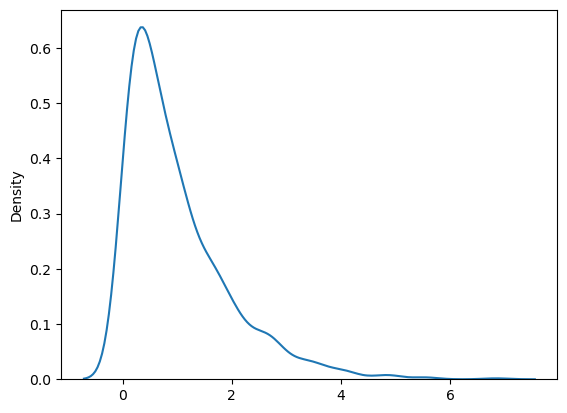

In [60]:
from scipy. stats import boxcox

data = np.random.exponential(size= 1000)
sns.distplot(data, hist= False, kde= True)

C:\Users\mirwo\AppData\Local\Temp\ipykernel_19540\2839650521.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(transformed_data, hist=False, kde=True)


<Axes: ylabel='Density'>

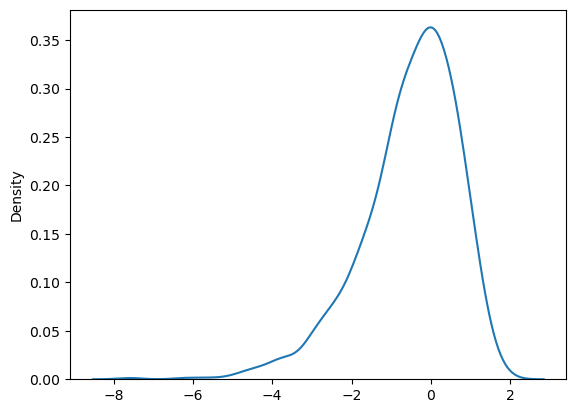

In [61]:
transformed_data = np.log(data)
sns.distplot(transformed_data, hist=False, kde=True)

C:\Users\mirwo\AppData\Local\Temp\ipykernel_19540\673703192.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(transformed_data, hist=False , kde=True)


<Axes: ylabel='Density'>

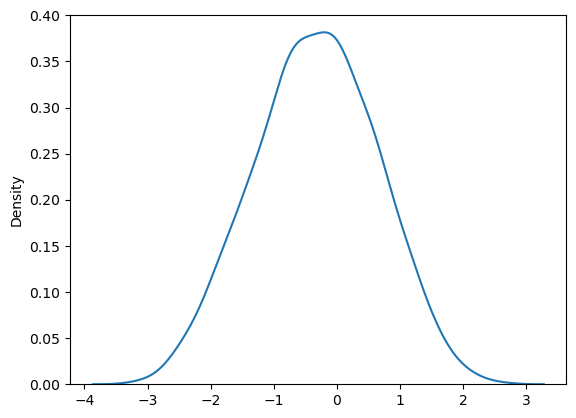

In [62]:
transformed_data, best_lambda = boxcox(data)

sns.distplot(transformed_data, hist=False , kde=True)

In [63]:
best_lambda

0.28094034465171924

# Домашнее задание

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/katarina74/ml_lessons/main/lesson_2/data/techparams_train.csv")
df

index  back-suspension  battery-capacity  charge-time  compression  \
0          0                9              -1.0        36457          9.0   
1          2                3              -1.0        44872          8.0   
2          4                3              -1.0        55927         16.0   
3          5                0              -1.0        41405         10.3   
4          7                8              -1.0        22523         19.0   
...      ...              ...               ...          ...          ...   
43240  61224                9              -1.0        34558         11.2   
43241  61225                3              -1.0        38268          9.6   
43242  61226                3              -1.0         8958         10.0   
43243  61227                3              -1.0        20293          8.5   
43244  61228               10              -1.0        52459          8.6   

       consumption-mixed  cylinders-order  cylinders-value  engine-feeding  \
0                    4.3                0                3               4   
1                   -1.0                3                7               4   
2                    4.2                0                4               5   
3                   -1.0                0                4               4   
4                   -1.0                0                4               8   
...                  ...              ...              ...             ...   
43240                6.6                0                4               4   
43241                5.8                0                4               2   
43242                9.3                0                4               4   
43243               -1.0                0                5               4   
43244               -1.0                0                4               4   

       engine-start  ...  configurations_front-brake  \
0              2006  ...                           1   
1              1982  ...                           4   
2              2014  ...                           4   
3              2000  ...                           4   
4              2000  ...                           4   
...             ...  ...                         ...   
43240          2004  ...                           1   
43241          2013  ...                           4   
43242          1991  ...                           4   
43243          2002  ...                           1   
43244          1982  ...                           1   

       configurations_safety-rating  configurations_seats  \
0                                 2                    13   
1                                 2                    13   
2                                 2                    13   
3                                 2                    13   
4                                 1                    13   
...                             ...                   ...   
43240                             2                    13   
43241                             2                    13   
43242                             2                    13   
43243                             2                    13   
43244                             2                     8   

       configurations_tank-volume  supergen_year-stop  models_country-from  \
0                            40.0              2018.0                   16   
1                           108.0              1993.0                   34   
2                            55.0              2019.0                   35   
3                            55.0              2003.0                   10   
4                            62.0              2005.0                   10   
...                           ...                 ...                  ...   
43240                        47.0              2016.0                   15   
43241                        65.0              2015.0                   10   
43242                        55.0    

Данные: технические характеристики разных конфигураций автомобилей

Таргет: длина колесной базы конфигурации (в миллиметрах).

Задача: добиться наименьшего MSE на test.

<h3>Информация по столбцам</h3>

In [3]:
#Здесь выводим список всех имеющихся столбцов (потом пригодится)
sorted(df.columns)

['back-suspension',
 'battery-capacity',
 'charge-time',
 'compression',
 'configurations_auto-premiere',
 'configurations_back-wheel-base',
 'configurations_front-brake',
 'configurations_safety-rating',
 'configurations_seats',
 'configurations_tank-volume',
 'consumption-mixed',
 'cylinders-order',
 'cylinders-value',
 'engine-feeding',
 'engine-start',
 'engine-stop',
 'engine-type',
 'gear-type',
 'index',
 'luxury',
 'max-speed',
 'models_country-from',
 'models_group',
 'models_light-and-commercial',
 'models_male',
 'power-electro-kw',
 'supergen_year-stop',
 'supply-system',
 'target',
 'valves',
 'valvetrain',
 'weight']

In [4]:
#Здесь пишем функцию, которая строит boxplot и scatterplot (с target) по выбранному датафрейму (их будет больше одного) и столбцу
def bp(dataframe, column_name):
    return (sns.boxplot(data=dataframe, x=column_name), plt.title(f'График распределения {column_name}'), plt.show(), 
            sns.scatterplot(data=dataframe, x=column_name, y='target'), plt.title(f'Поле корреляции {column_name} и target'), plt.show())

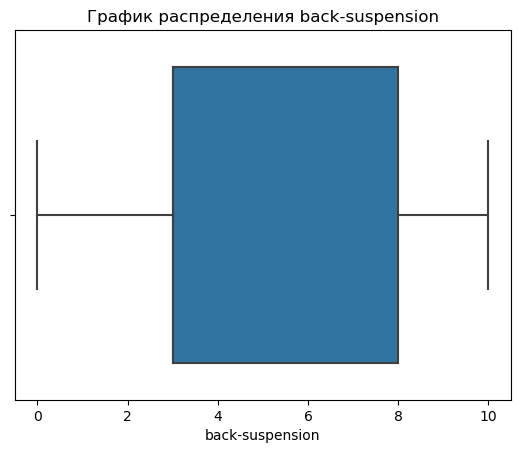

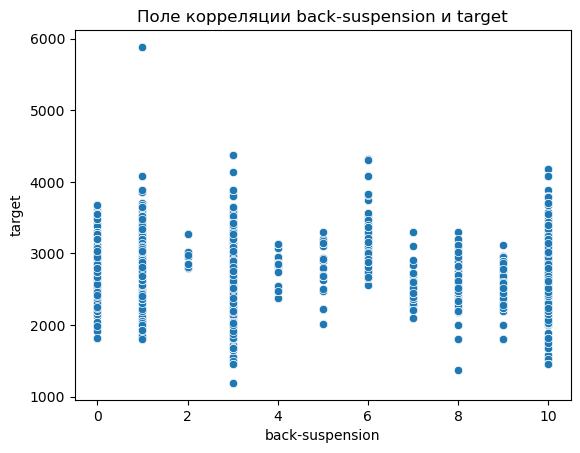

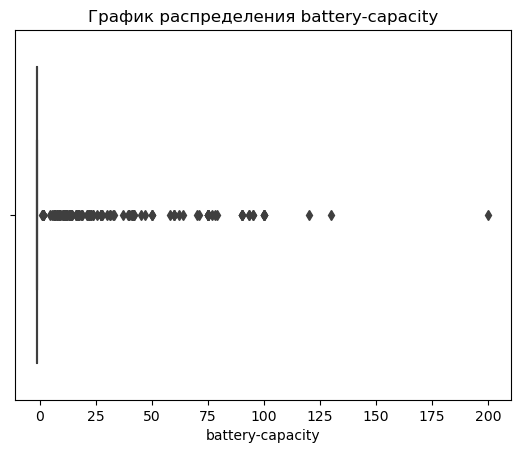

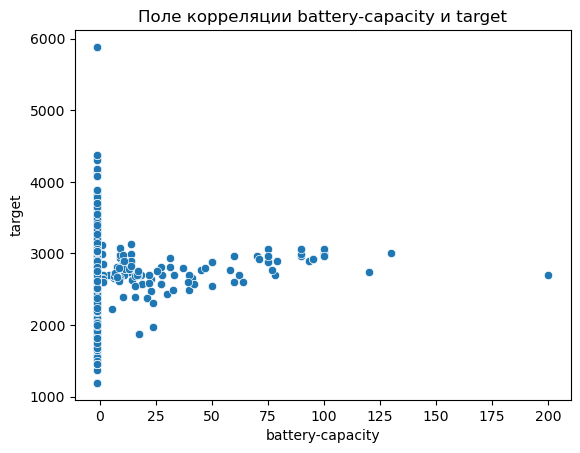

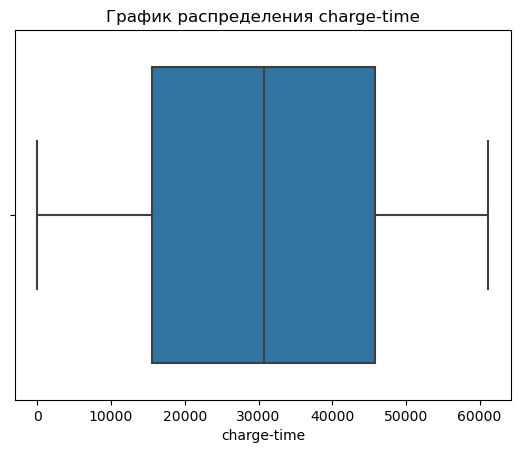

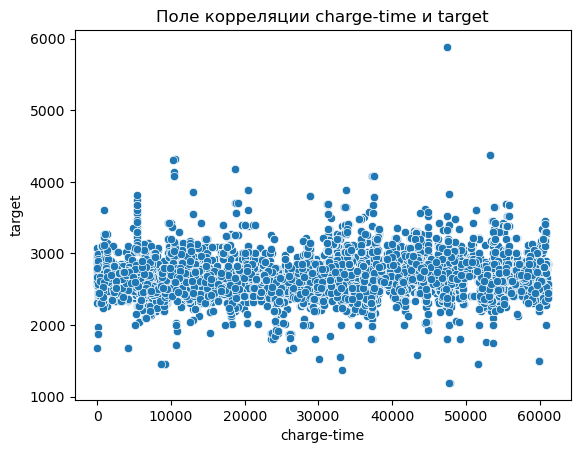

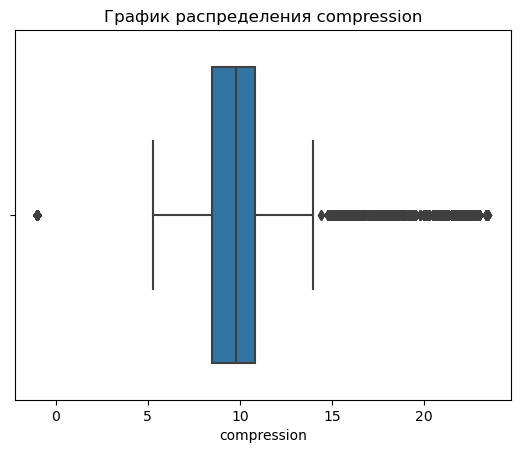

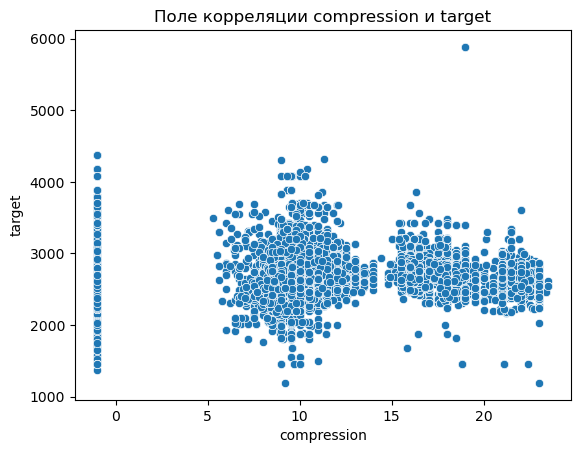

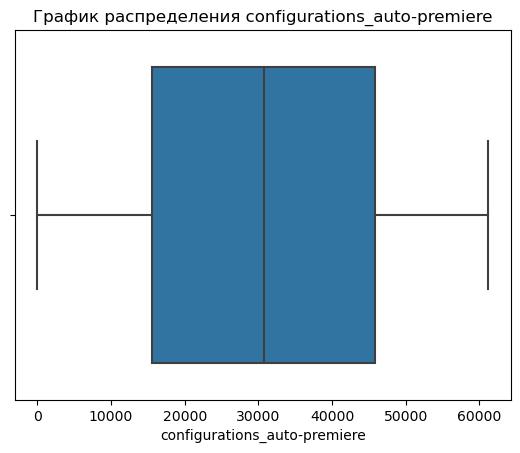

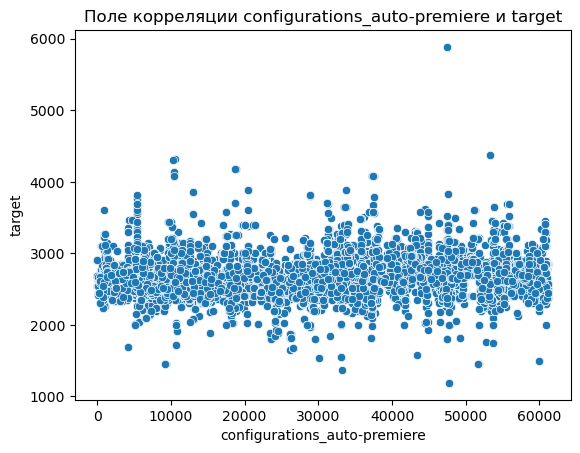

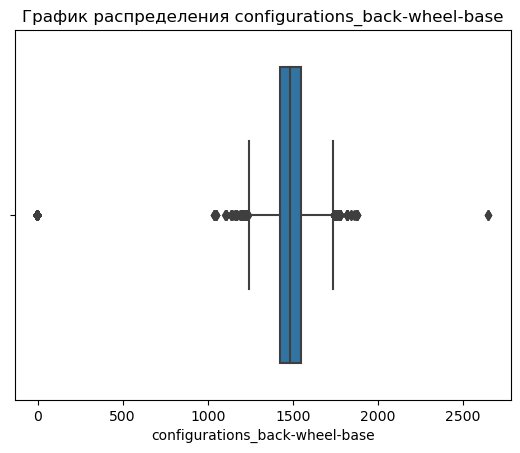

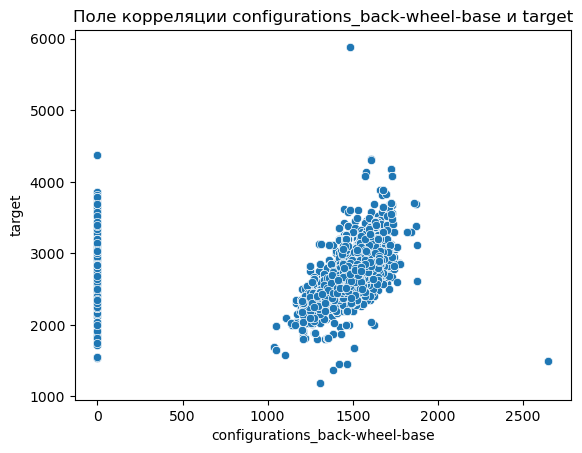

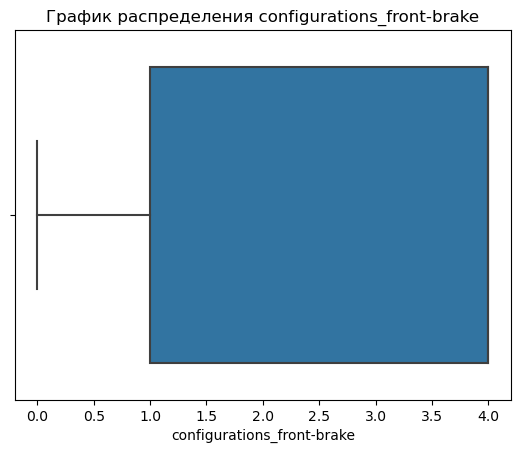

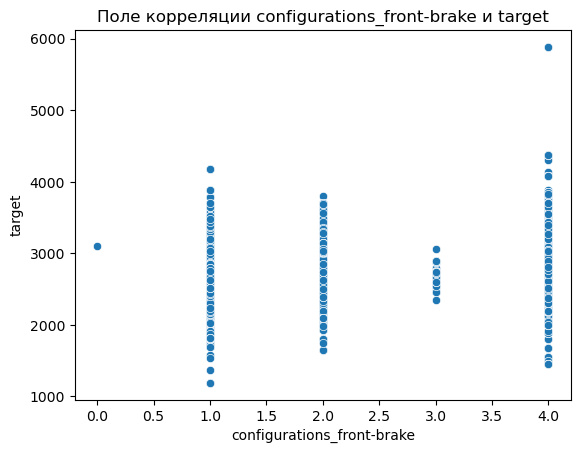

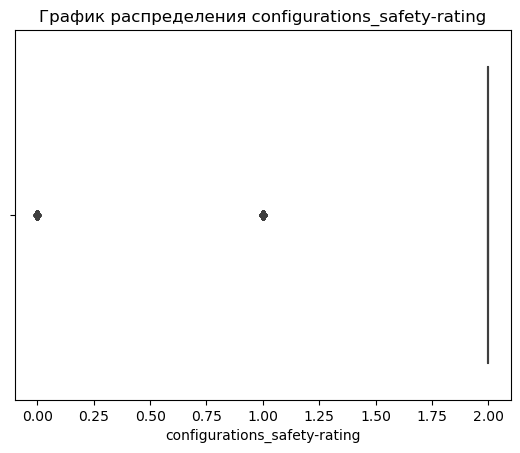

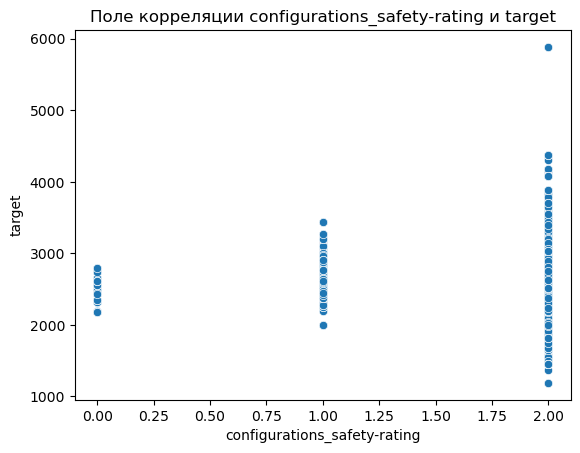

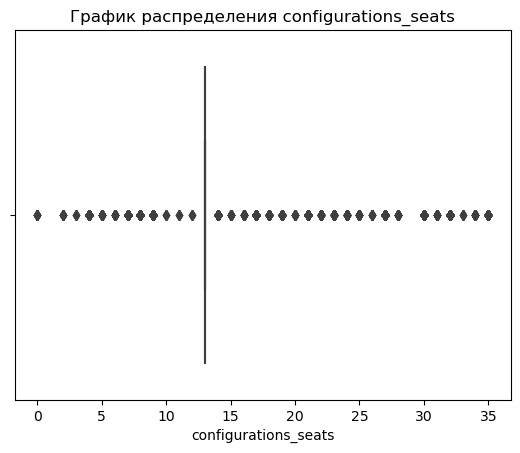

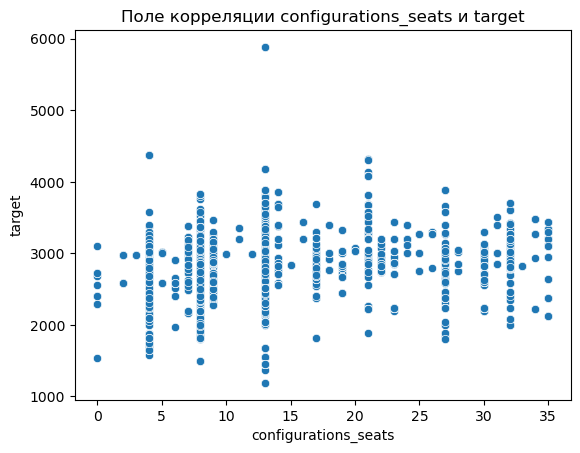

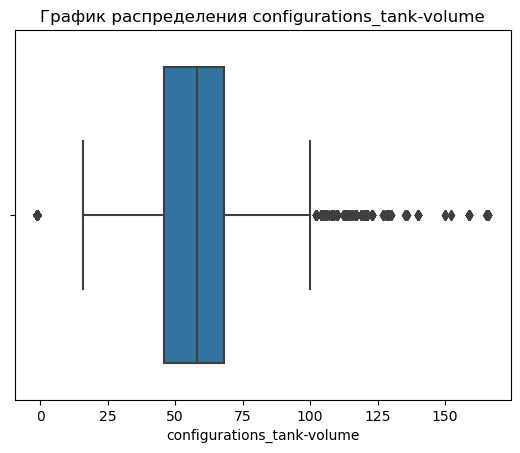

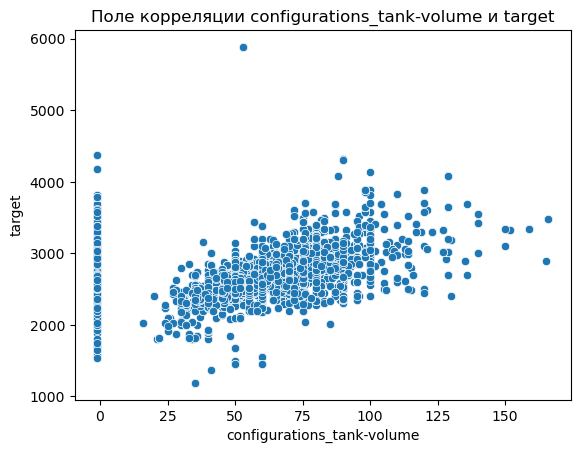

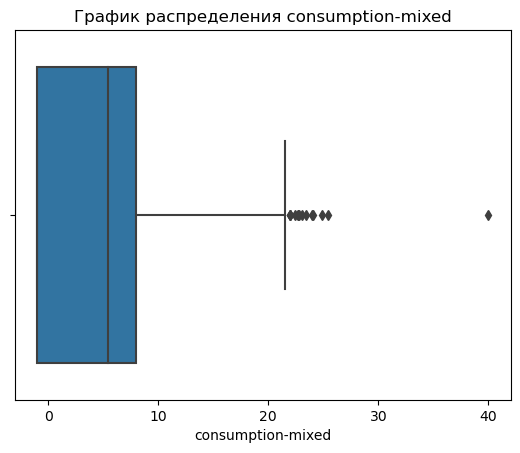

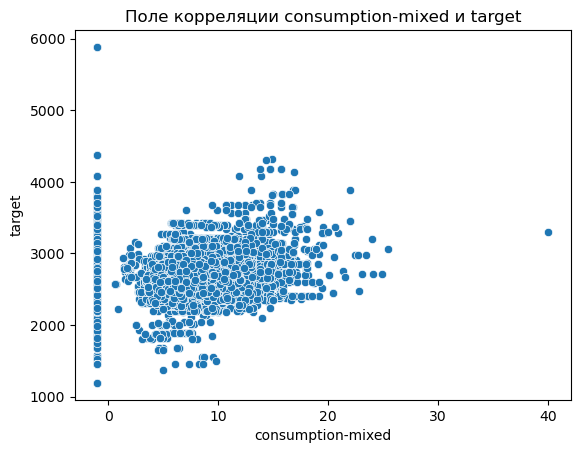

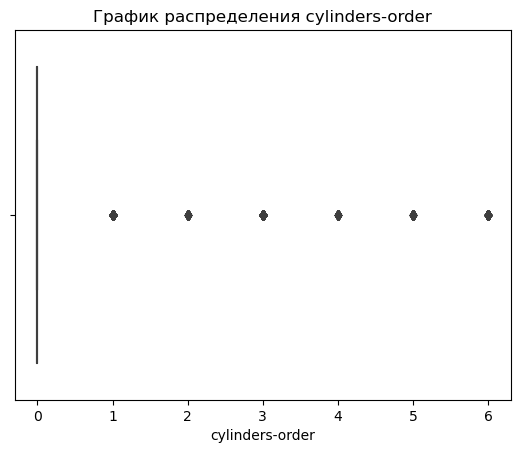

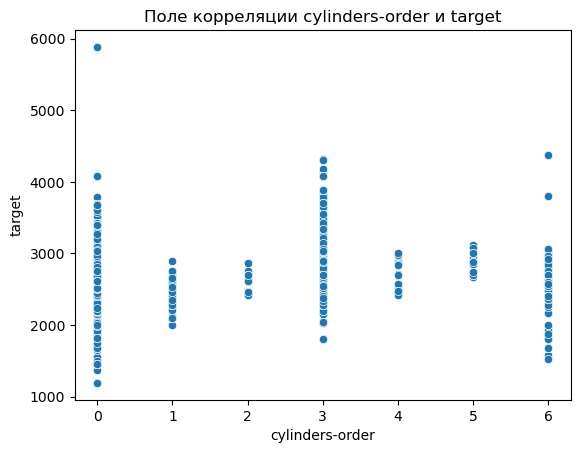

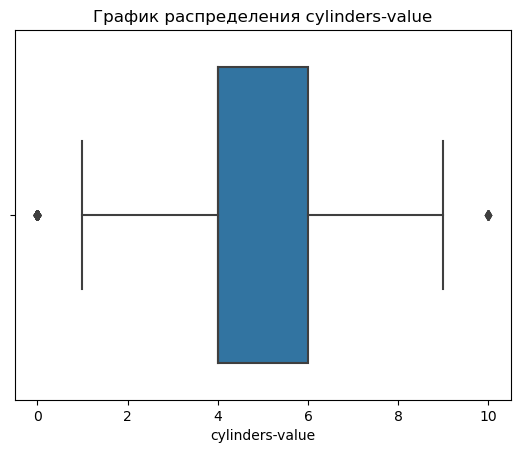

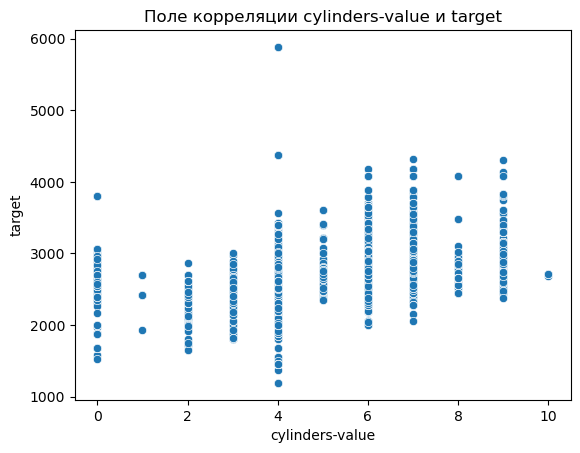

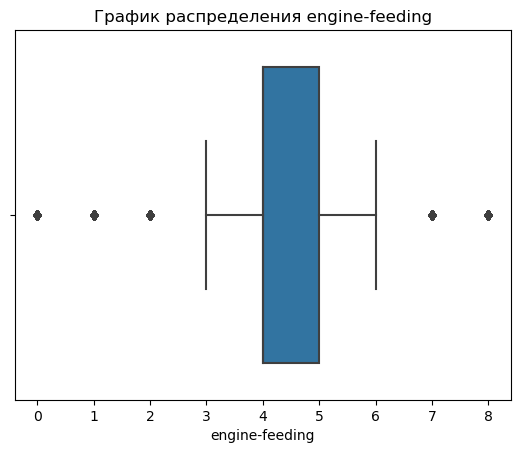

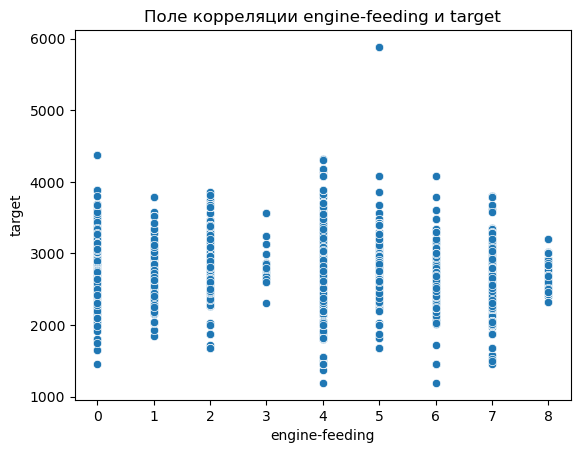

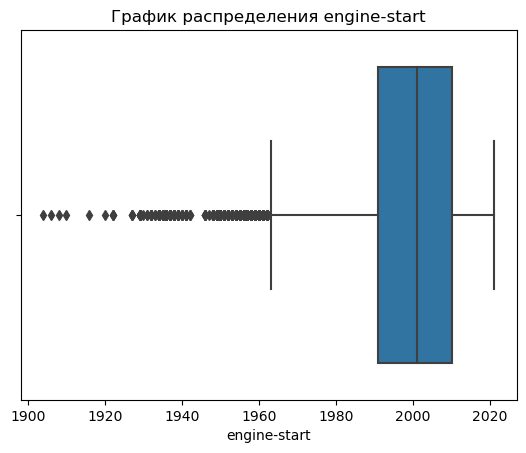

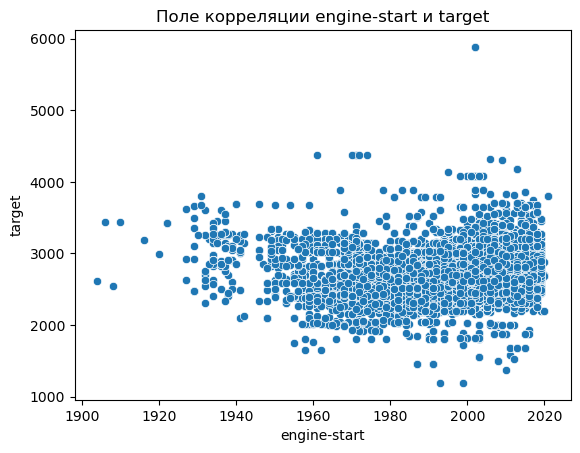

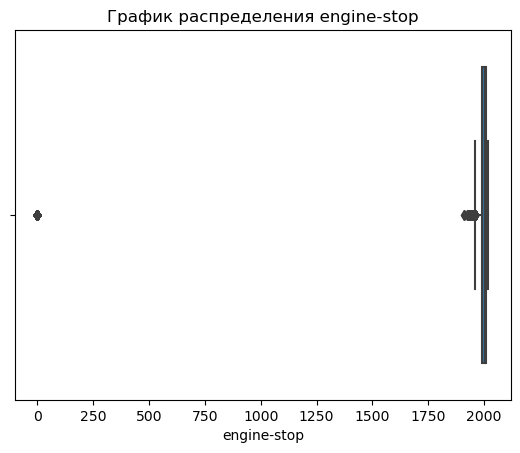

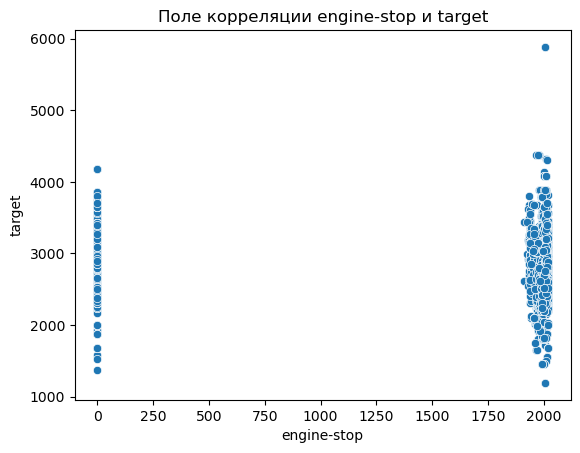

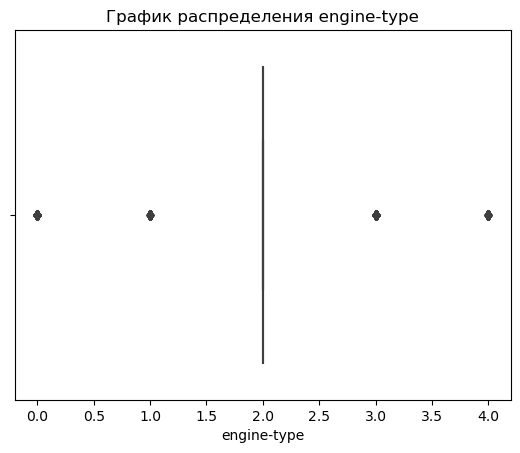

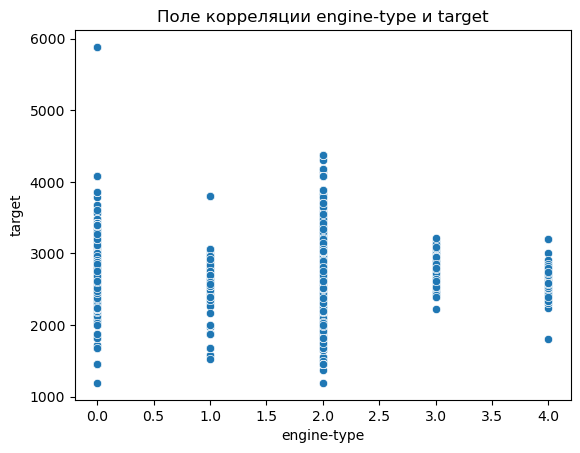

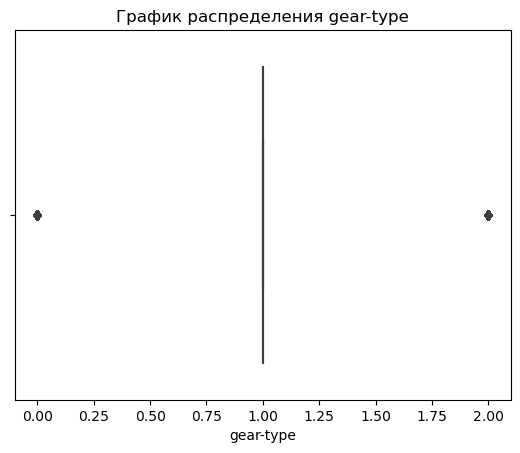

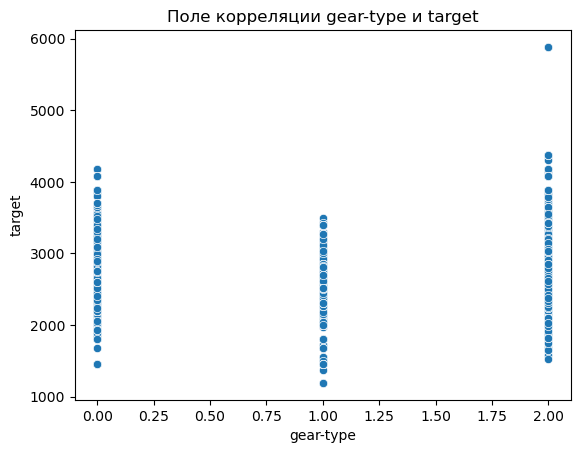

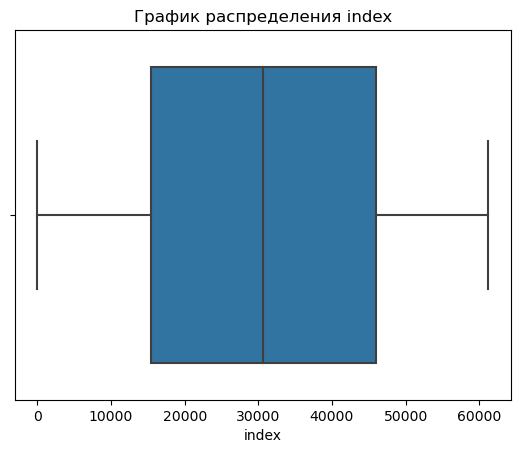

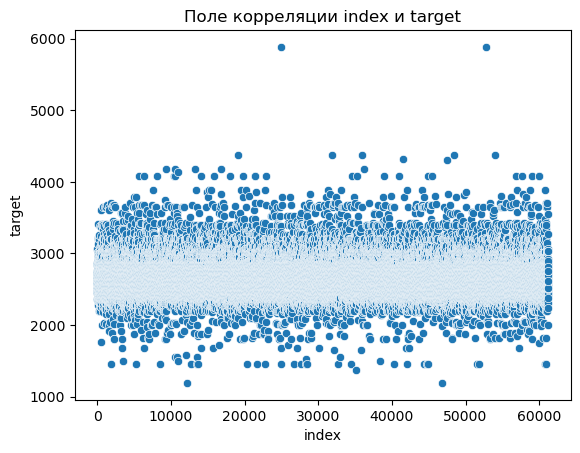

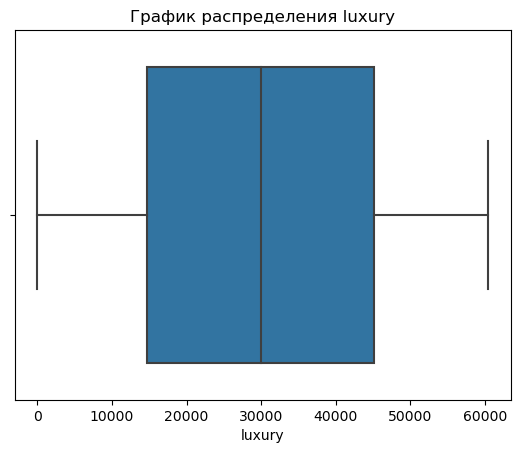

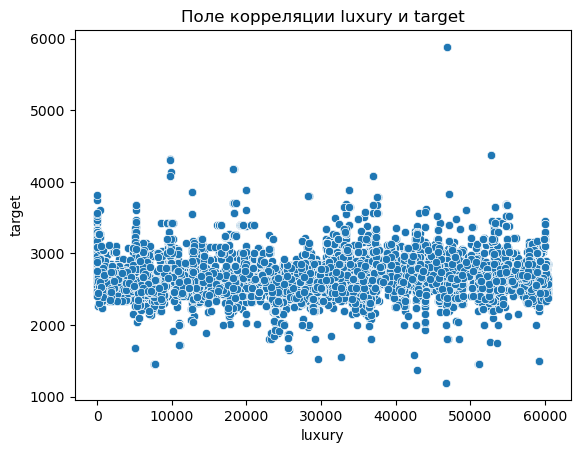

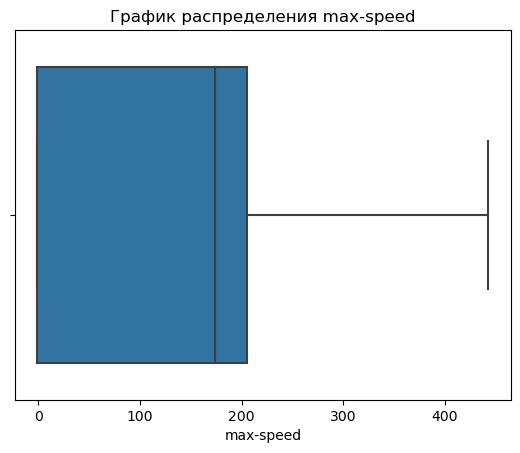

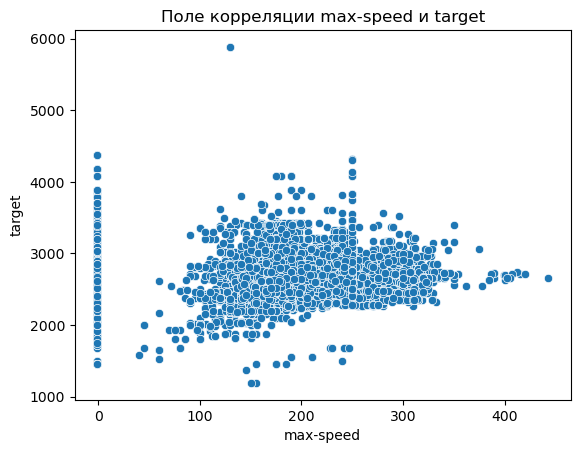

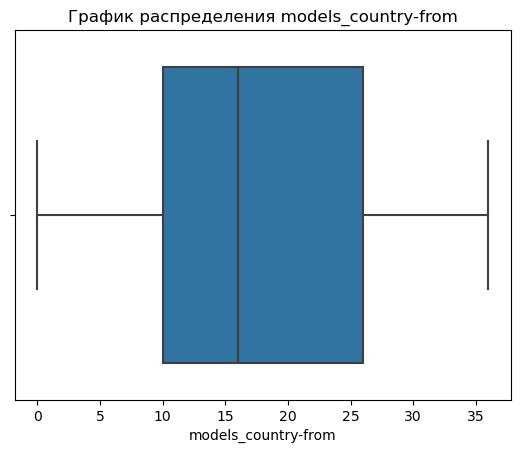

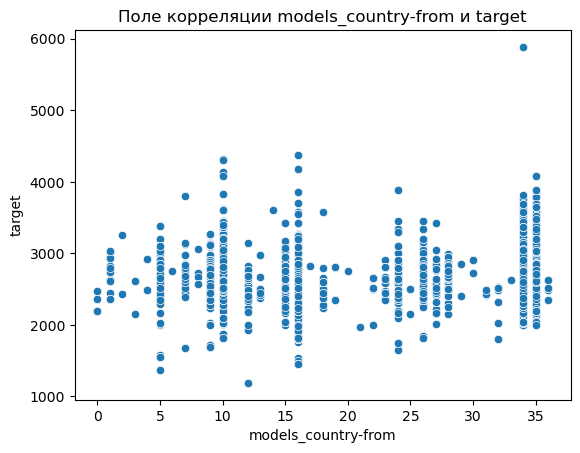

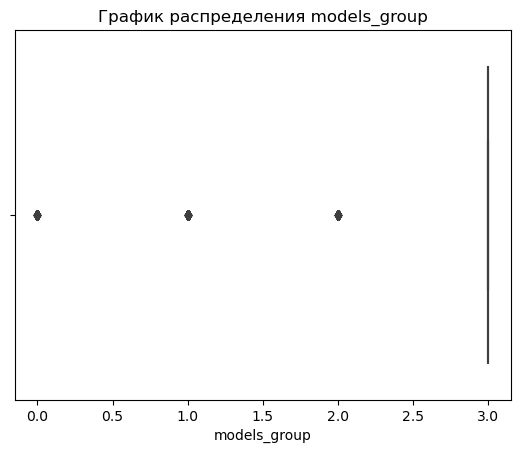

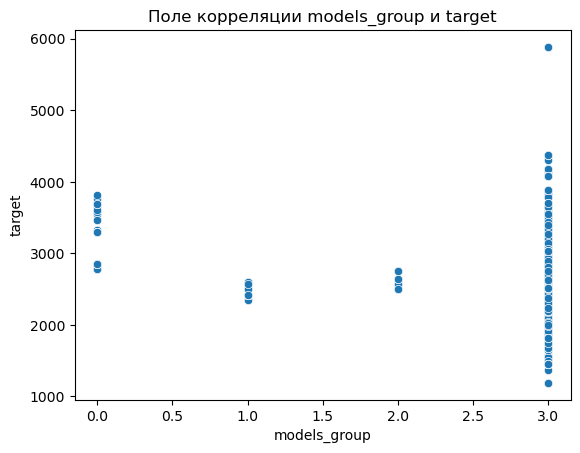

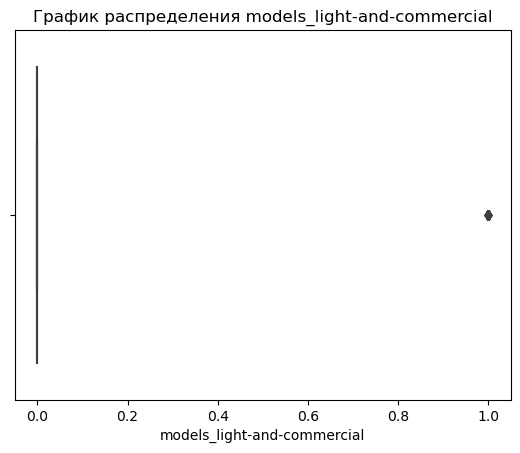

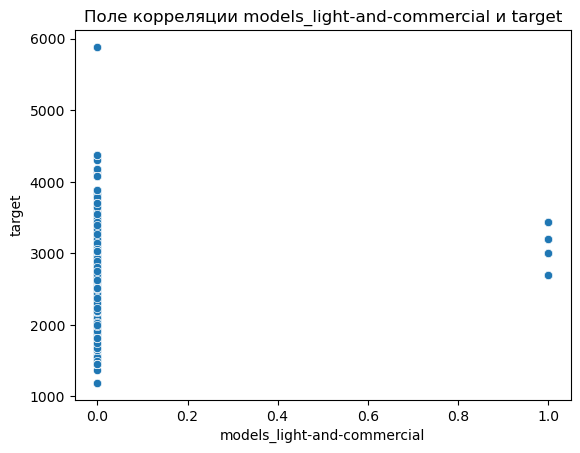

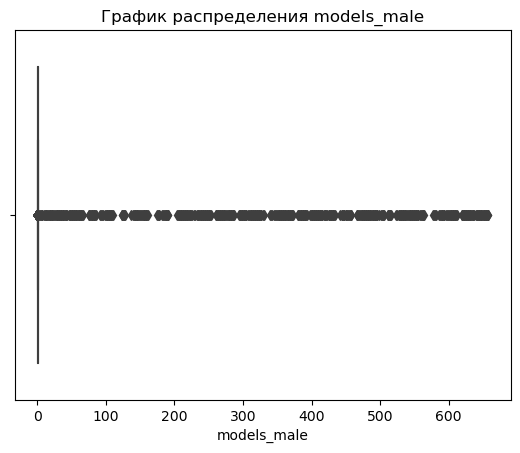

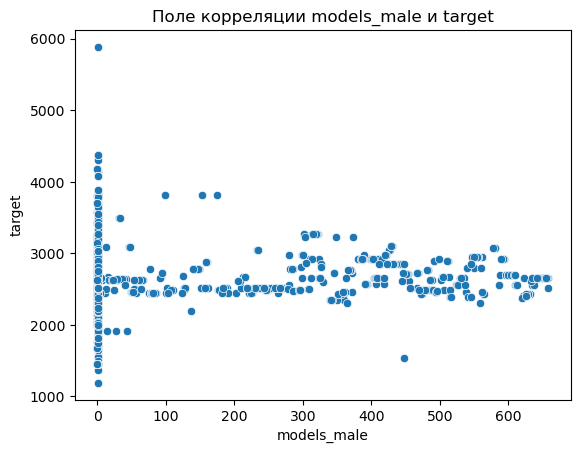

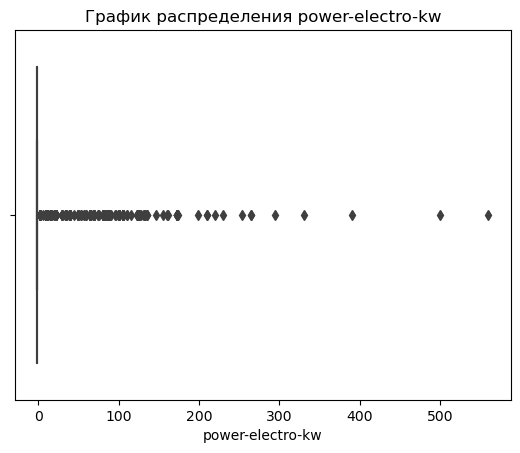

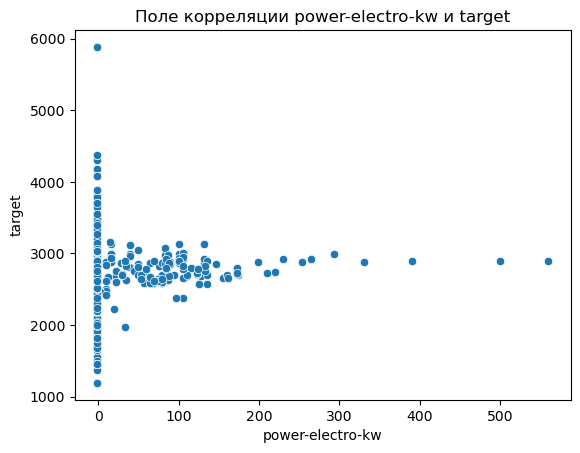

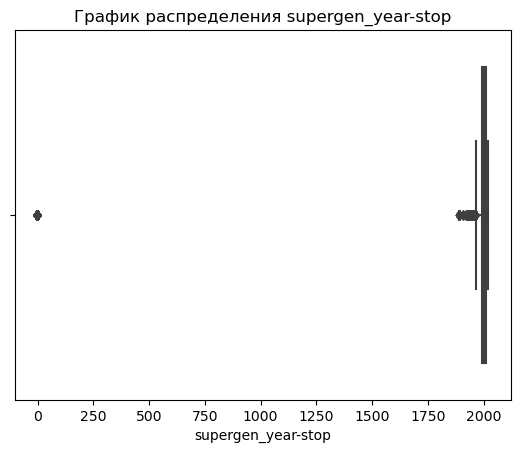

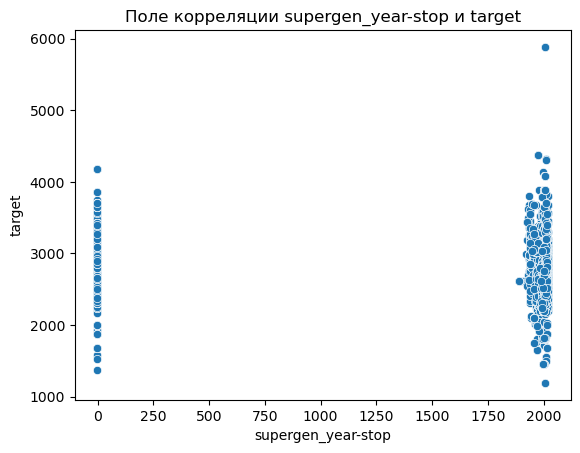

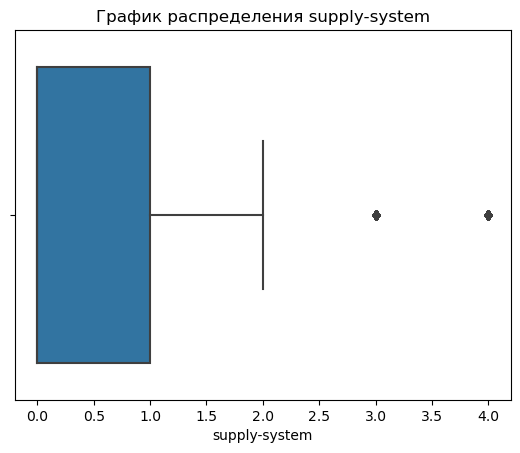

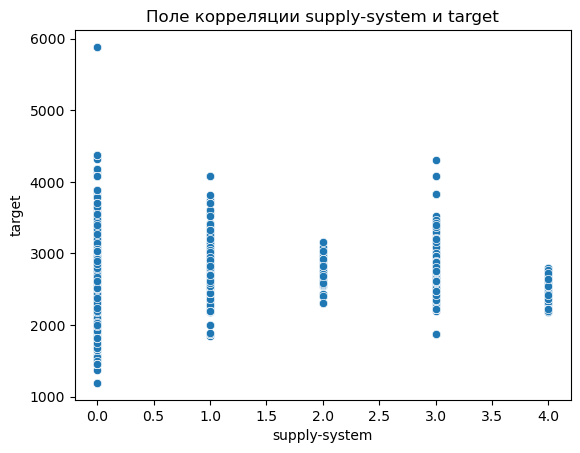

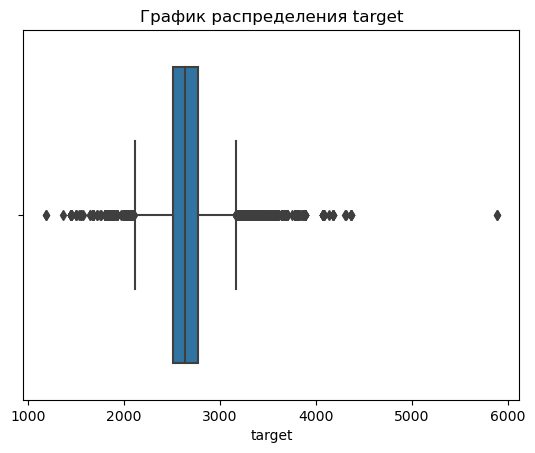

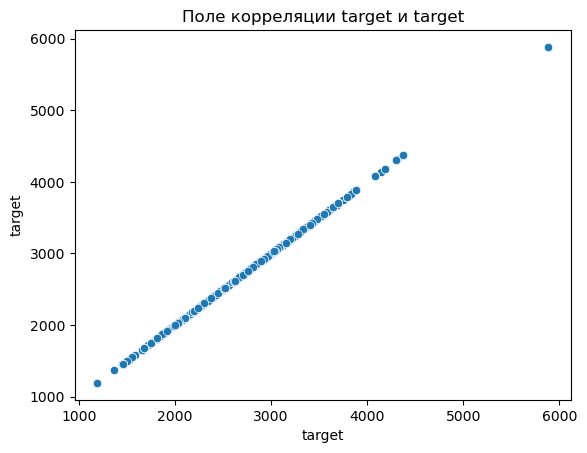

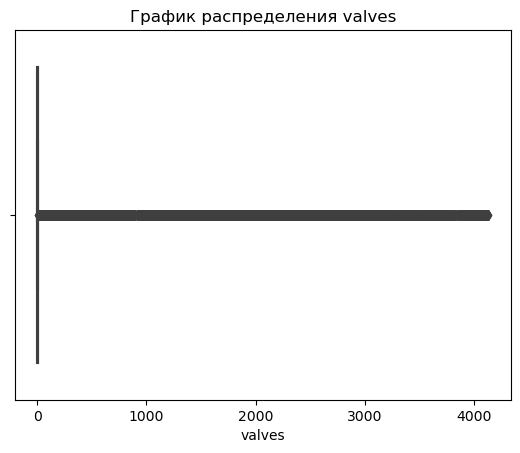

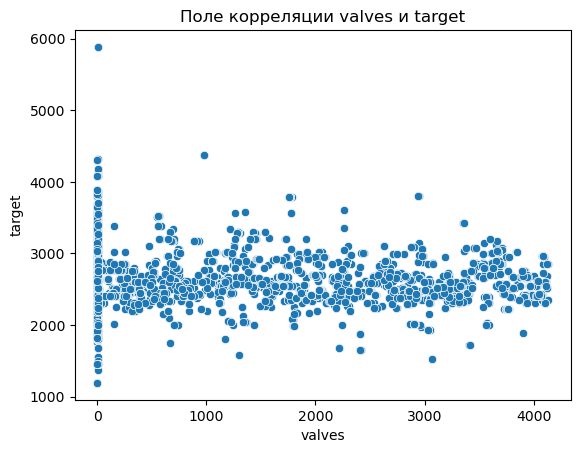

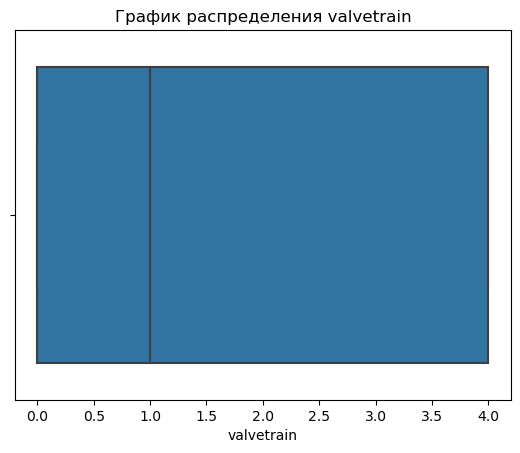

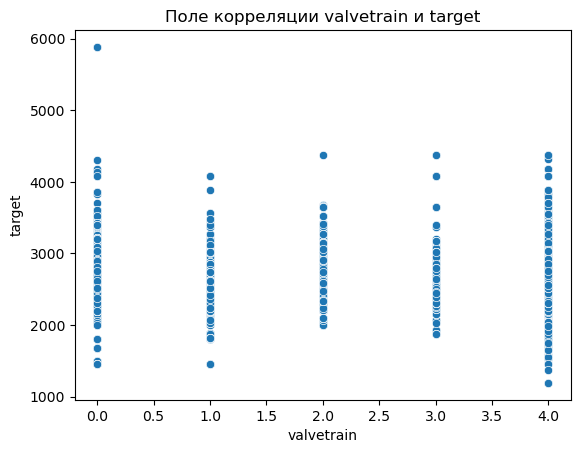

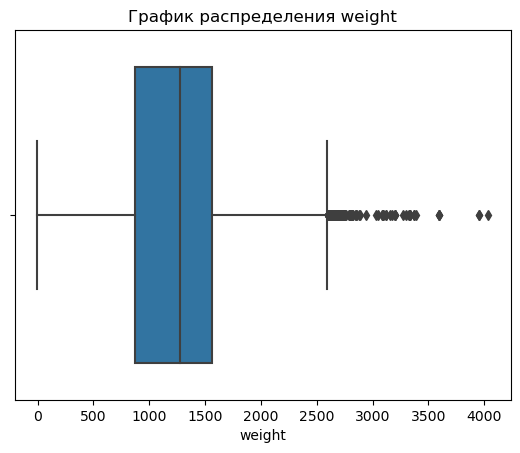

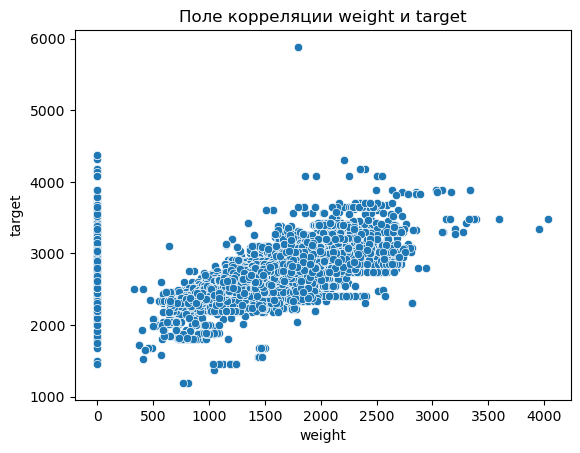

In [5]:
# Пробиваем функцию для каждого столбца
for i in sorted(df.columns):
    bp(df, i)

<strong>Выводы:</strong>
<br>1. Надо отдельно пробивать столбцы (несколько) на значения -1 и исключать соответствующие записи (реализовать в цикле)
<br>2. Столбцы 'back-suspension', 'configurations_front-brake', 'configurations_safety-rating', 'configurations_seats', 'cylinders-order', 
'cylinders-value', 'engine-feeding', 'engine-type', 'gear-type', 'models_country-from', 'models_group', 'supply-system', 'valvetrain' 
перевести в фиктивные переменные
<br>3. Удалить 10 максимальных значений в 'target'

In [6]:
# Новый датафрейм, в котором будем добавлять переменные
df_ready = df
df_ready

index  back-suspension  battery-capacity  charge-time  compression  \
0          0                9              -1.0        36457          9.0   
1          2                3              -1.0        44872          8.0   
2          4                3              -1.0        55927         16.0   
3          5                0              -1.0        41405         10.3   
4          7                8              -1.0        22523         19.0   
...      ...              ...               ...          ...          ...   
43240  61224                9              -1.0        34558         11.2   
43241  61225                3              -1.0        38268          9.6   
43242  61226                3              -1.0         8958         10.0   
43243  61227                3              -1.0        20293          8.5   
43244  61228               10              -1.0        52459          8.6   

       consumption-mixed  cylinders-order  cylinders-value  engine-feeding  \
0                    4.3                0                3               4   
1                   -1.0                3                7               4   
2                    4.2                0                4               5   
3                   -1.0                0                4               4   
4                   -1.0                0                4               8   
...                  ...              ...              ...             ...   
43240                6.6                0                4               4   
43241                5.8                0                4               2   
43242                9.3                0                4               4   
43243               -1.0                0                5               4   
43244               -1.0                0                4               4   

       engine-start  ...  configurations_front-brake  \
0              2006  ...                           1   
1              1982  ...                           4   
2              2014  ...                           4   
3              2000  ...                           4   
4              2000  ...                           4   
...             ...  ...                         ...   
43240          2004  ...                           1   
43241          2013  ...                           4   
43242          1991  ...                           4   
43243          2002  ...                           1   
43244          1982  ...                           1   

       configurations_safety-rating  configurations_seats  \
0                                 2                    13   
1                                 2                    13   
2                                 2                    13   
3                                 2                    13   
4                                 1                    13   
...                             ...                   ...   
43240                             2                    13   
43241                             2                    13   
43242                             2                    13   
43243                             2                    13   
43244                             2                     8   

       configurations_tank-volume  supergen_year-stop  models_country-from  \
0                            40.0              2018.0                   16   
1                           108.0              1993.0                   34   
2                            55.0              2019.0                   35   
3                            55.0              2003.0                   10   
4                            62.0              2005.0                   10   
...                           ...                 ...                  ...   
43240                        47.0              2016.0                   15   
43241                        65.0              2015.0                   10   
43242                        55.0    

In [7]:
#Создаём список из индексов по условию "в строке есть -1 в одном из столбцов"
indexes = []

for i in sorted(df.columns):
    indexes.extend(np.where(df.loc[:, i] == -1)[0])
    
indexes = sorted(set(indexes))
df_ready = df.drop(indexes).reset_index(drop=True)
df_ready

index  back-suspension  battery-capacity  charge-time  compression  \
0   2463                3               1.3        39910         10.5   
1   7622                3               1.3        39961         10.5   
2  18016                6               9.2            6         10.2   
3  24677                3               1.1        21838         10.0   
4  31751                6               1.3        39354          9.6   
5  34353                3               1.3        39367         10.5   
6  42532                3              17.1           18         10.5   
7  43398                3               8.7        21619         10.0   
8  56103                3              10.8         6014         10.5   
9  60076                3               7.7            2         11.0   

   consumption-mixed  cylinders-order  cylinders-value  engine-feeding  \
0                6.3                0                4               2   
1                6.2                0                4               2   
2                2.0                0                4               2   
3                4.1                0                4               2   
4                6.3                0                4               2   
5                6.4                0                4               2   
6                2.8                0                4               4   
7                1.5                0                4               2   
8                3.4                3                6               2   
9                2.1                0                3               2   

   engine-start  ...  configurations_front-brake  \
0          2013  ...                           4   
1          2013  ...                           4   
2          2016  ...                           4   
3          2015  ...                           4   
4          2011  ...                           4   
5          2011  ...                           4   
6          2015  ...                           4   
7          2014  ...                           4   
8          2014  ...                           4   
9          2015  ...                           4   

   configurations_safety-rating  configurations_seats  \
0                             2                     9   
1                             2                    13   
2                             2                    13   
3                             2                    13   
4                             2                    13   
5                             2                    13   
6                             2                     8   
7                             1                    13   
8                             2                    13   
9                             1                    13   

   configurations_tank-volume  supergen_year-stop  models_country-from  \
0                        90.0              2017.0                   10   
1                        82.0              2017.0                   10   
2                        78.0              2019.0                   10   
3                        55.0              2018.0                   10   
4                        90.0              2014.0                   10   
5                        90.0              2014.0                   10   
6                        35.0              2016.0                   35   
7                        50.0              2017.0                   10   
8                       100.0              2018.0                   10   
9                        51.0              2018.0                   10   

   models_group  models_light-and-commercial  models_male  target  
0             3                            0            1    3122  
1             3                            0            1    2992  
2             3                            0            1    3070  
3             3                            0            1    2651  
4             3             

In [8]:
#Проверка, что в удалённых строках есть -1 хотя бы в одном столбце
df.query('index not in (2463, 7622, 18016, 24677, 31751, 34353, 42532, 43398, 56103, 60076)')

index  back-suspension  battery-capacity  charge-time  compression  \
0          0                9              -1.0        36457          9.0   
1          2                3              -1.0        44872          8.0   
2          4                3              -1.0        55927         16.0   
3          5                0              -1.0        41405         10.3   
4          7                8              -1.0        22523         19.0   
...      ...              ...               ...          ...          ...   
43240  61224                9              -1.0        34558         11.2   
43241  61225                3              -1.0        38268          9.6   
43242  61226                3              -1.0         8958         10.0   
43243  61227                3              -1.0        20293          8.5   
43244  61228               10              -1.0        52459          8.6   

       consumption-mixed  cylinders-order  cylinders-value  engine-feeding  \
0                    4.3                0                3               4   
1                   -1.0                3                7               4   
2                    4.2                0                4               5   
3                   -1.0                0                4               4   
4                   -1.0                0                4               8   
...                  ...              ...              ...             ...   
43240                6.6                0                4               4   
43241                5.8                0                4               2   
43242                9.3                0                4               4   
43243               -1.0                0                5               4   
43244               -1.0                0                4               4   

       engine-start  ...  configurations_front-brake  \
0              2006  ...                           1   
1              1982  ...                           4   
2              2014  ...                           4   
3              2000  ...                           4   
4              2000  ...                           4   
...             ...  ...                         ...   
43240          2004  ...                           1   
43241          2013  ...                           4   
43242          1991  ...                           4   
43243          2002  ...                           1   
43244          1982  ...                           1   

       configurations_safety-rating  configurations_seats  \
0                                 2                    13   
1                                 2                    13   
2                                 2                    13   
3                                 2                    13   
4                                 1                    13   
...                             ...                   ...   
43240                             2                    13   
43241                             2                    13   
43242                             2                    13   
43243                             2                    13   
43244                             2                     8   

       configurations_tank-volume  supergen_year-stop  models_country-from  \
0                            40.0              2018.0                   16   
1                           108.0              1993.0                   34   
2                            55.0              2019.0                   35   
3                            55.0              2003.0                   10   
4                            62.0              2005.0                   10   
...                           ...                 ...                  ...   
43240                        47.0              2016.0                   15   
43241                        65.0              2015.0                   10   
43242                        55.0    

<strong>Это перебор</strong>
<br>Вариант решения проблемы: на основе полей корреляции отобрать столбцы, по котороым не смотреть значения в -1

In [9]:
sorted(df.columns)

['back-suspension',
 'battery-capacity',
 'charge-time',
 'compression',
 'configurations_auto-premiere',
 'configurations_back-wheel-base',
 'configurations_front-brake',
 'configurations_safety-rating',
 'configurations_seats',
 'configurations_tank-volume',
 'consumption-mixed',
 'cylinders-order',
 'cylinders-value',
 'engine-feeding',
 'engine-start',
 'engine-stop',
 'engine-type',
 'gear-type',
 'index',
 'luxury',
 'max-speed',
 'models_country-from',
 'models_group',
 'models_light-and-commercial',
 'models_male',
 'power-electro-kw',
 'supergen_year-stop',
 'supply-system',
 'target',
 'valves',
 'valvetrain',
 'weight']

In [10]:
#Создаём список из индексов по условию "в строке есть -1 в одном из столбцов"
#Но теперь не по всем столбцам (смотрим на scatterplot)
indexes = []

for i in sorted(df.columns):
    if i not in ['battery-capacity', 'charge-time', 'consumption-mixed', 'engine-start', 'models_male', 'power-electro-kw', 'valves']:
        indexes.extend(np.where(df.loc[:, i] == -1)[0])
    
indexes = sorted(set(indexes))
df_ready = df.drop(indexes).reset_index(drop=True)
df_ready

index  back-suspension  battery-capacity  charge-time  compression  \
0          2                3              -1.0        44872          8.0   
1          4                3              -1.0        55927         16.0   
2          5                0              -1.0        41405         10.3   
3          7                8              -1.0        22523         19.0   
4          8                8              -1.0        22100          9.6   
...      ...              ...               ...          ...          ...   
19019  61216                8              -1.0        12898         10.5   
19020  61222                3              -1.0        44295         17.0   
19021  61225                3              -1.0        38268          9.6   
19022  61226                3              -1.0         8958         10.0   
19023  61227                3              -1.0        20293          8.5   

       consumption-mixed  cylinders-order  cylinders-value  engine-feeding  \
0                   -1.0                3                7               4   
1                    4.2                0                4               5   
2                   -1.0                0                4               4   
3                   -1.0                0                4               8   
4                    6.0                0                4               2   
...                  ...              ...              ...             ...   
19019                6.1                0                4               4   
19020                7.1                0                6               5   
19021                5.8                0                4               2   
19022                9.3                0                4               4   
19023               -1.0                0                5               4   

       engine-start  ...  configurations_front-brake  \
0              1982  ...                           4   
1              2014  ...                           4   
2              2000  ...                           4   
3              2000  ...                           4   
4              2014  ...                           4   
...             ...  ...                         ...   
19019          2007  ...                           4   
19020          2005  ...                           4   
19021          2013  ...                           4   
19022          1991  ...                           4   
19023          2002  ...                           1   

       configurations_safety-rating  configurations_seats  \
0                                 2                    13   
1                                 2                    13   
2                                 2                    13   
3                                 1                    13   
4                                 2                    13   
...                             ...                   ...   
19019                             1                    13   
19020                             1                    13   
19021                             2                    13   
19022                             2                    13   
19023                             2                    13   

       configurations_tank-volume  supergen_year-stop  models_country-from  \
0                           108.0              1993.0                   34   
1                            55.0              2019.0                   35   
2                            55.0              2003.0                   10   
3                            62.0              2005.0                   10   
4                            45.0              2017.0                   10   
...                           ...                 ...                  ...   
19019                        52.0              2014.0                   10   
19020                        63.0              2010.0                   10   
19021                        65.0    

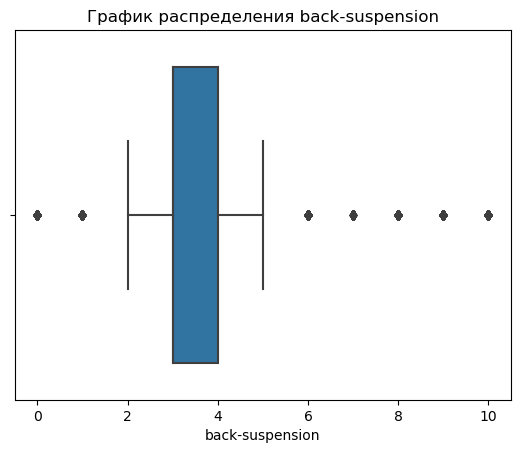

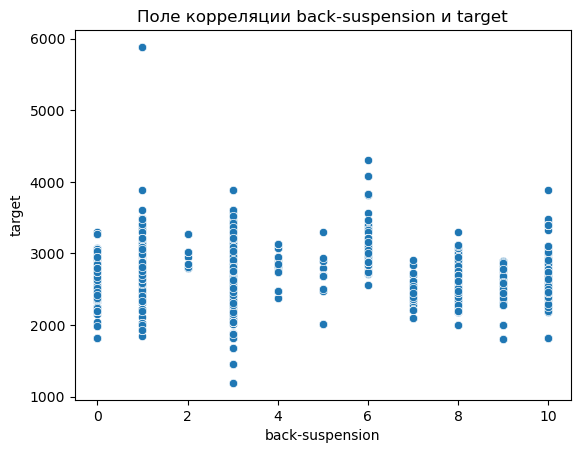

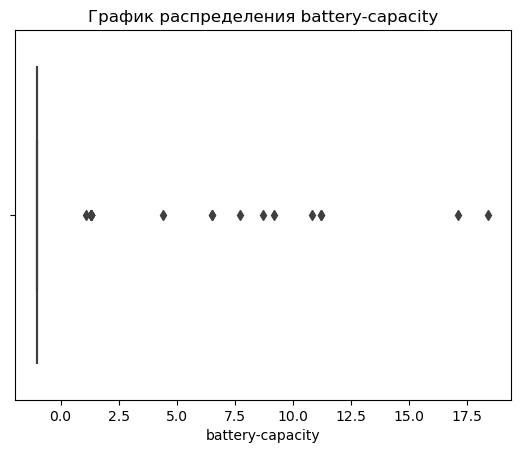

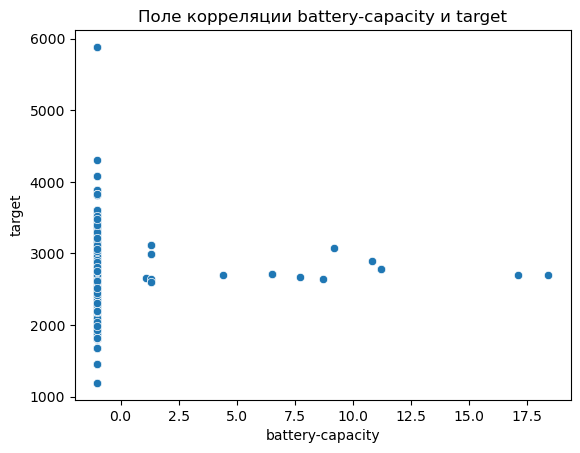

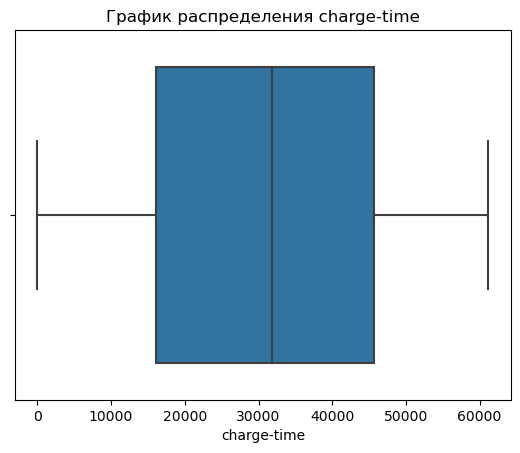

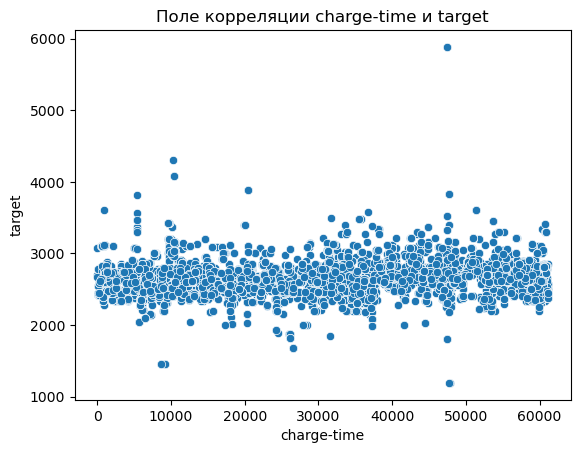

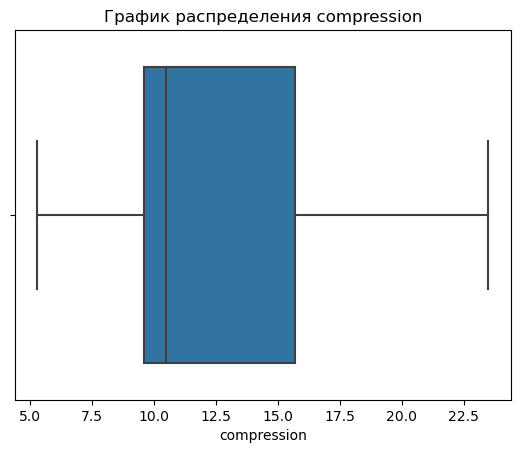

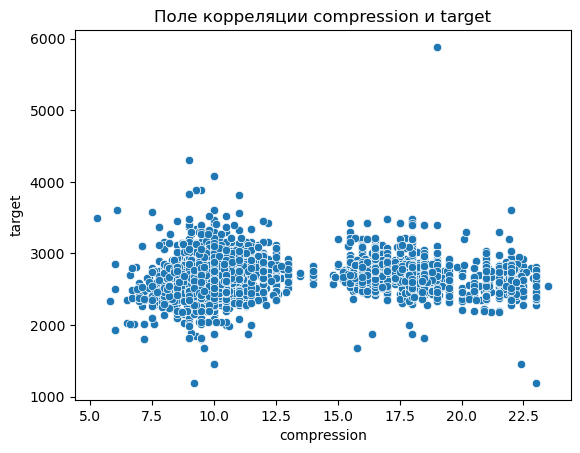

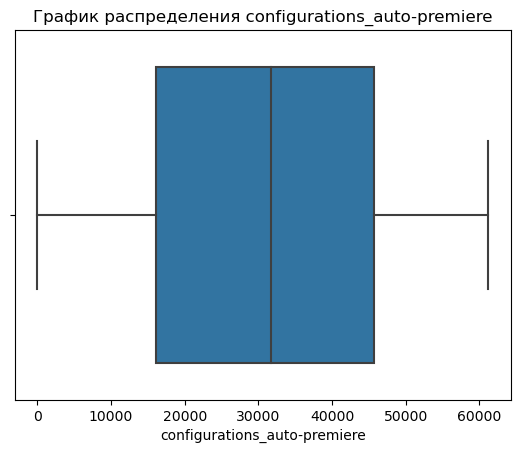

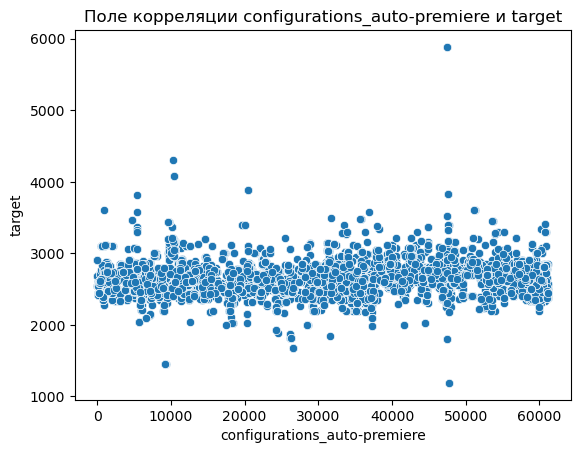

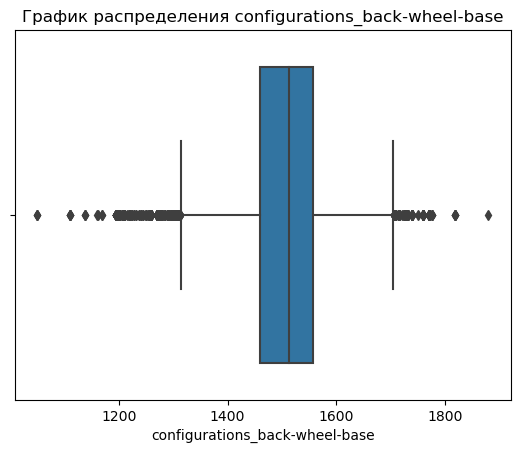

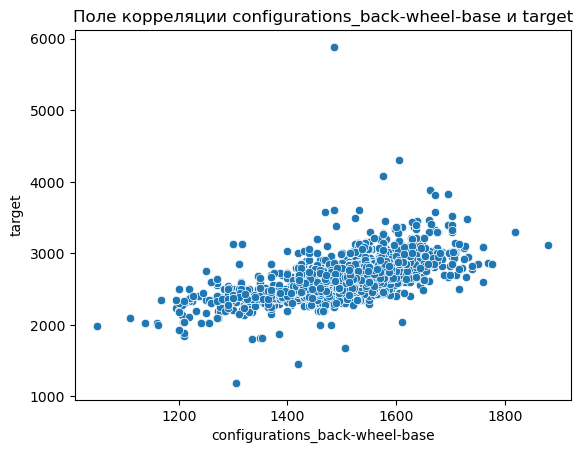

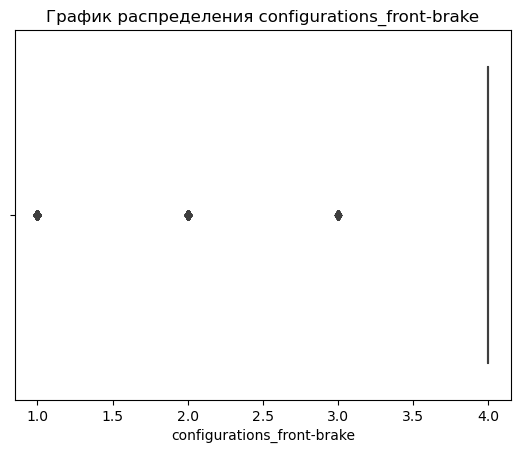

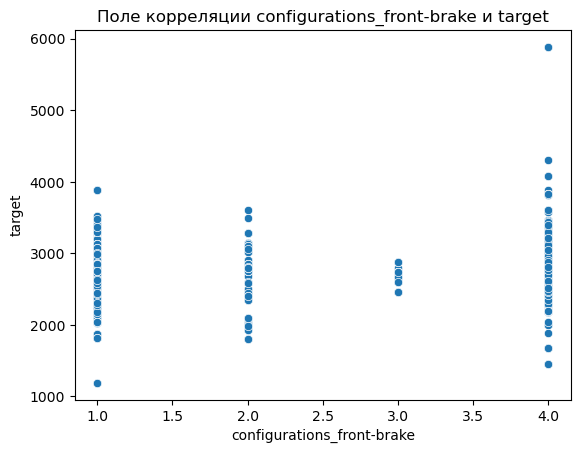

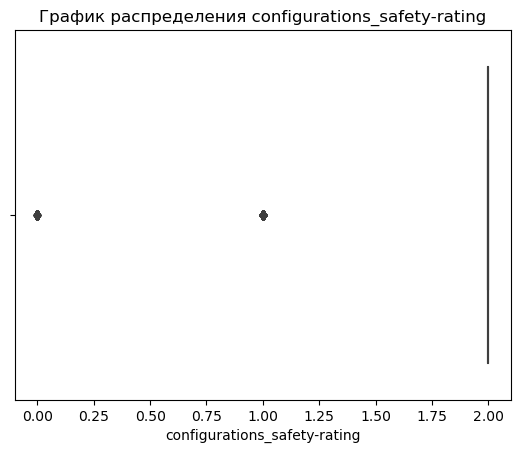

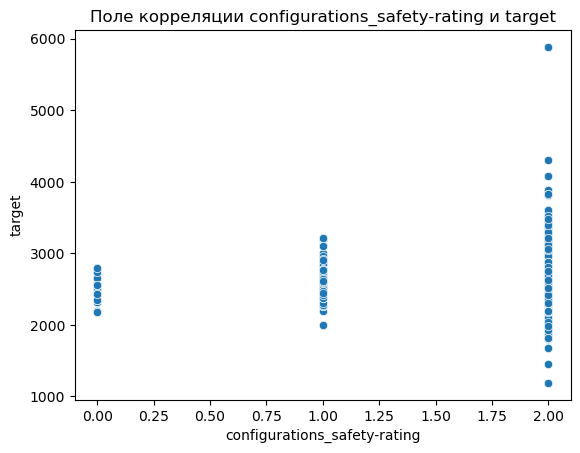

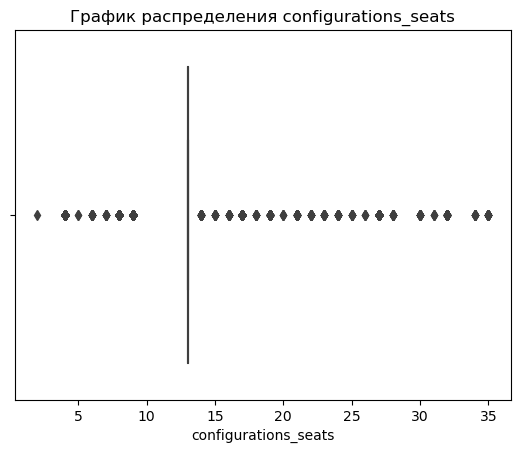

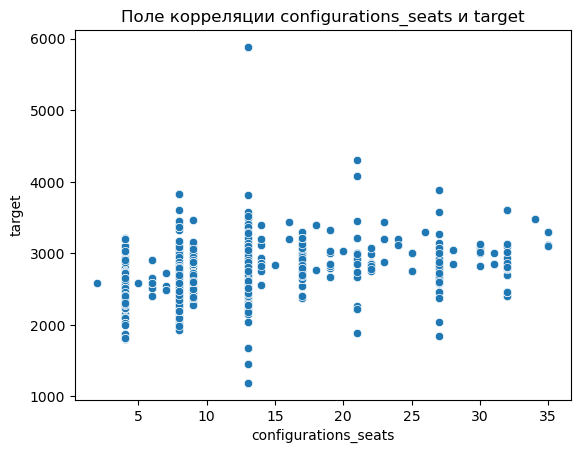

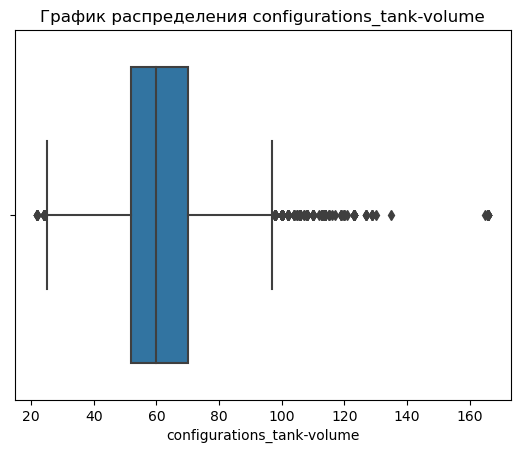

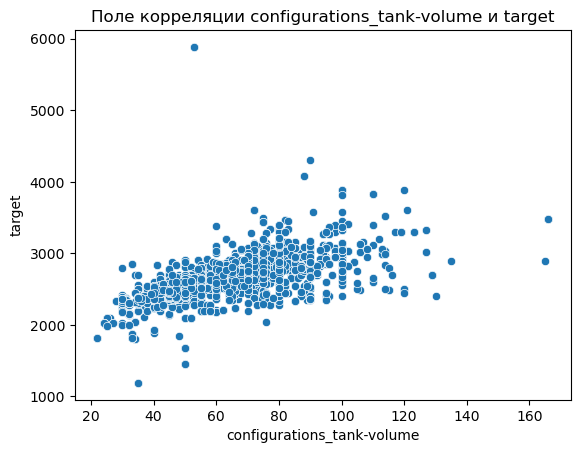

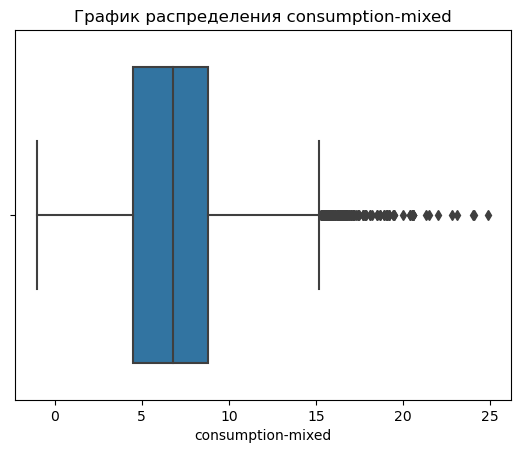

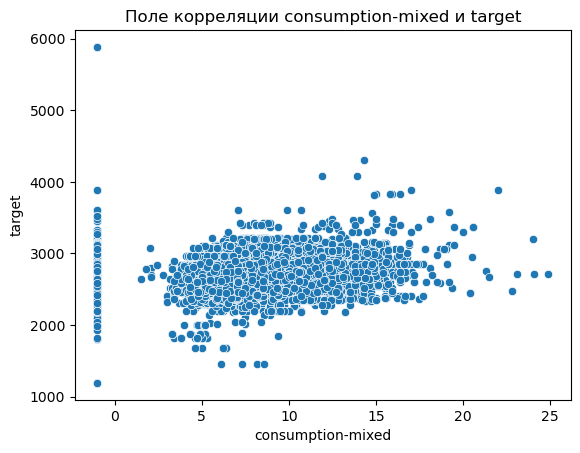

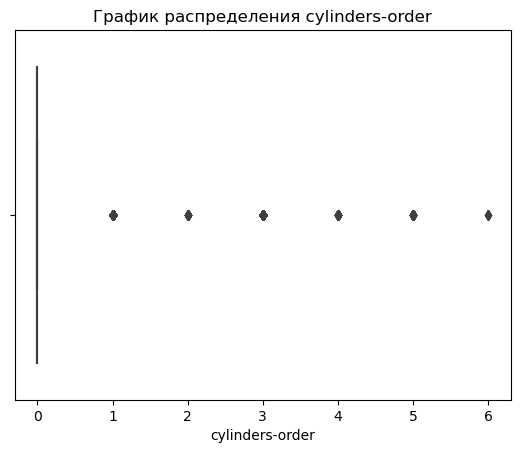

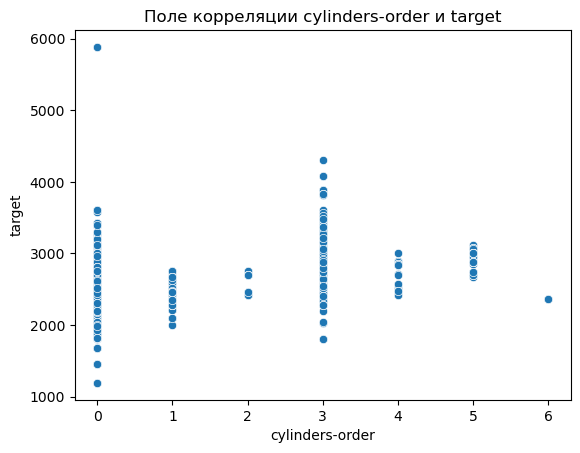

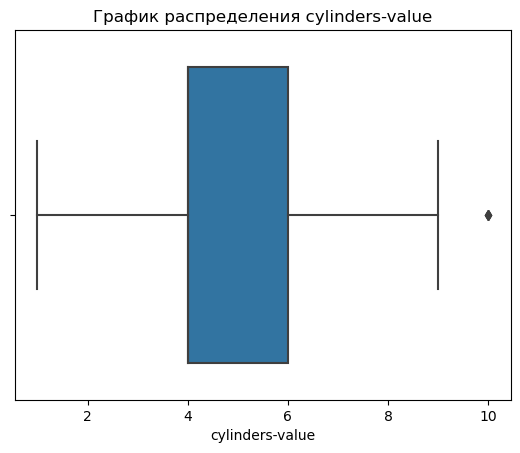

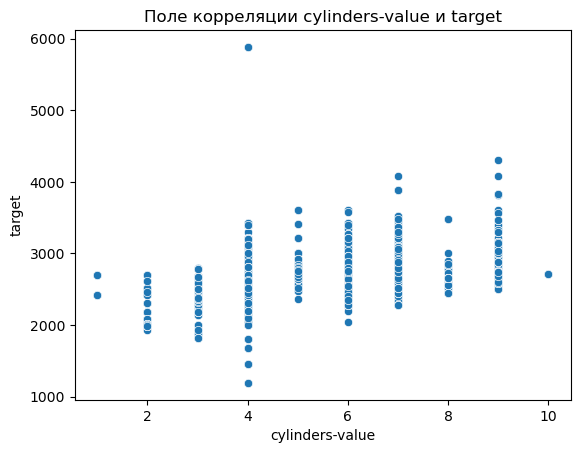

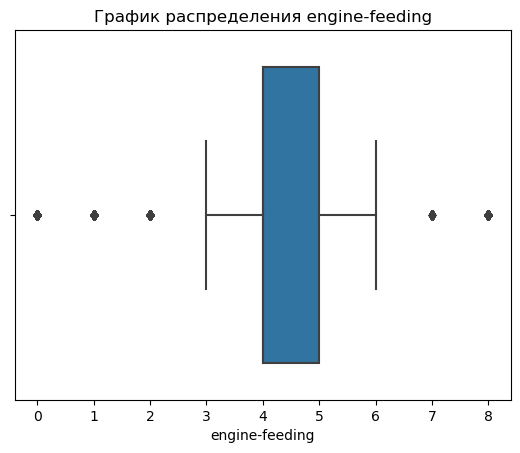

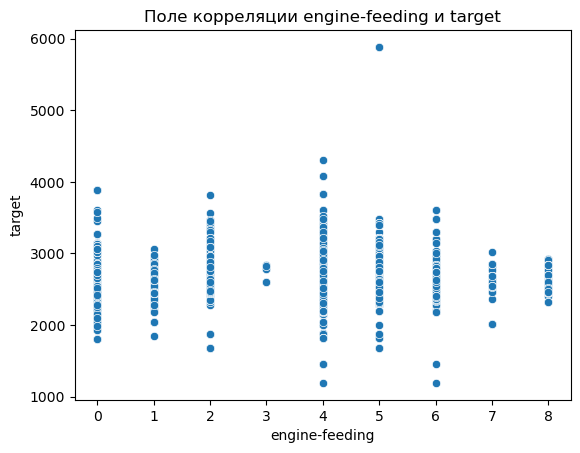

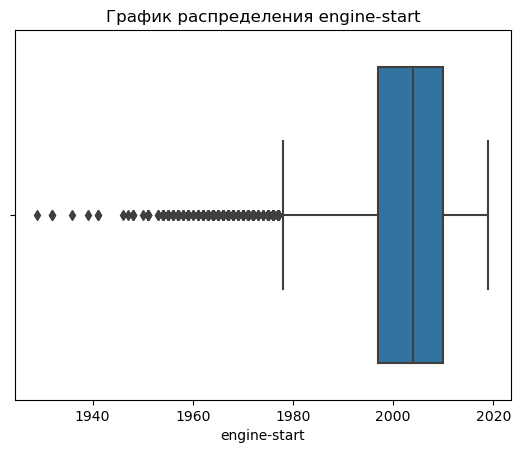

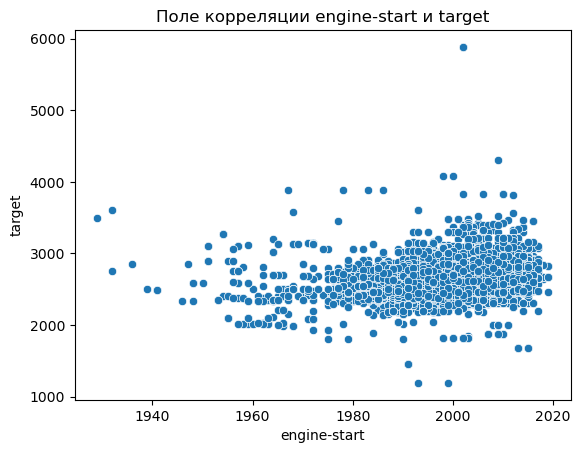

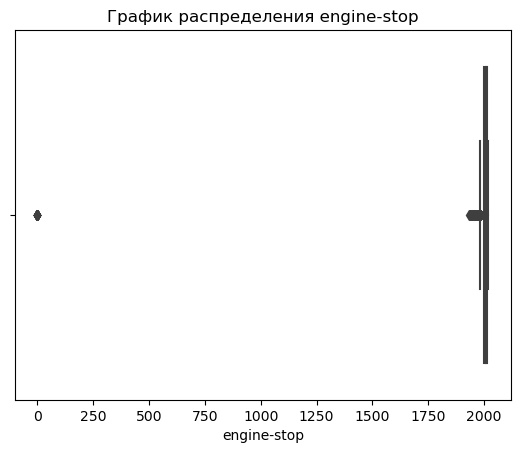

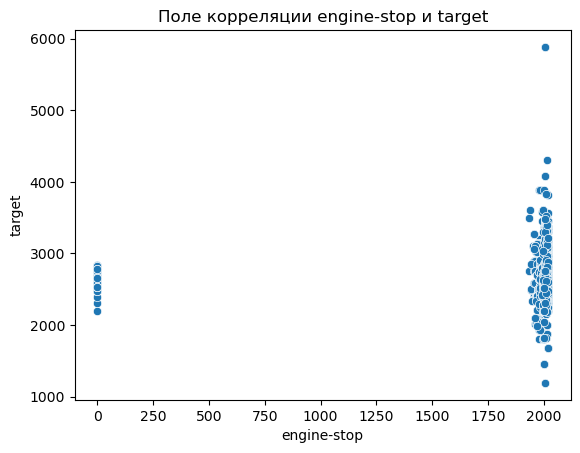

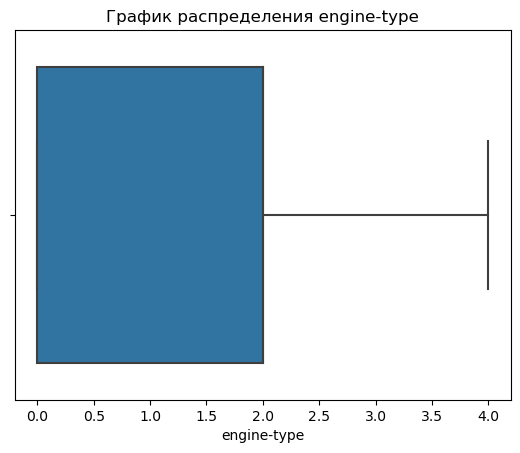

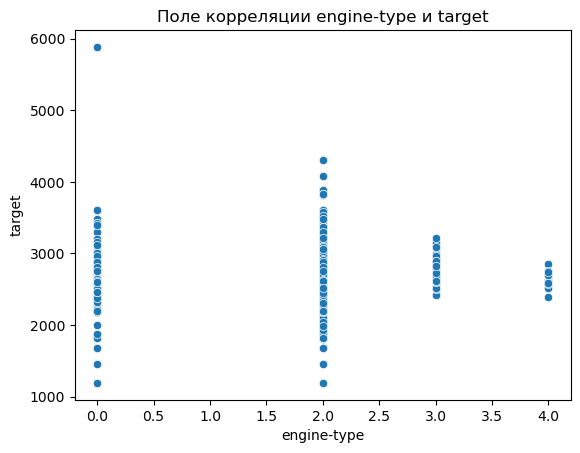

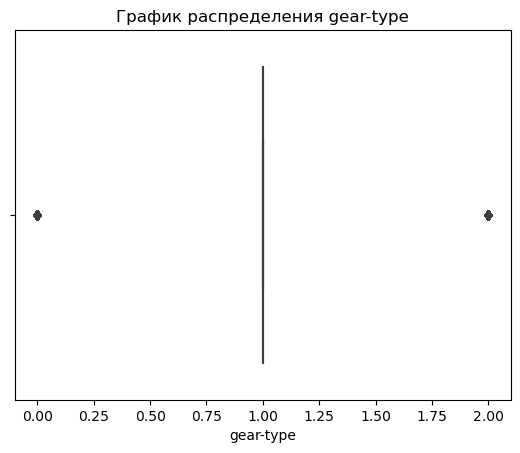

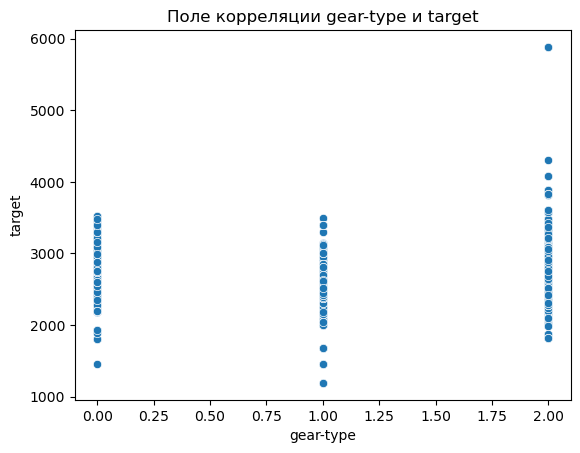

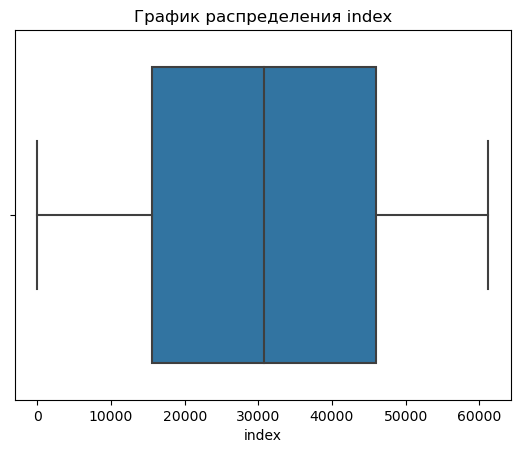

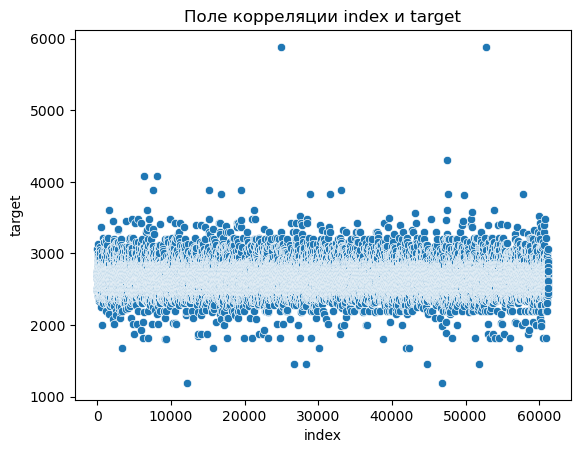

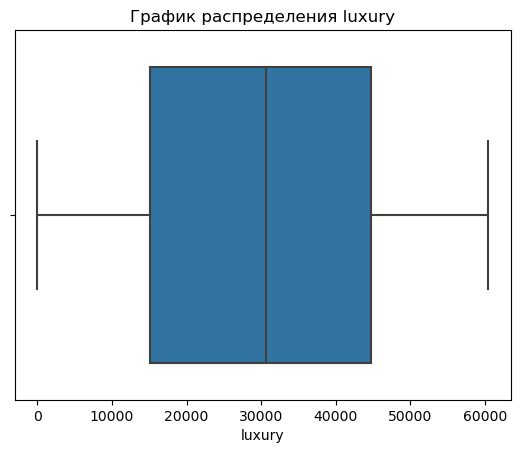

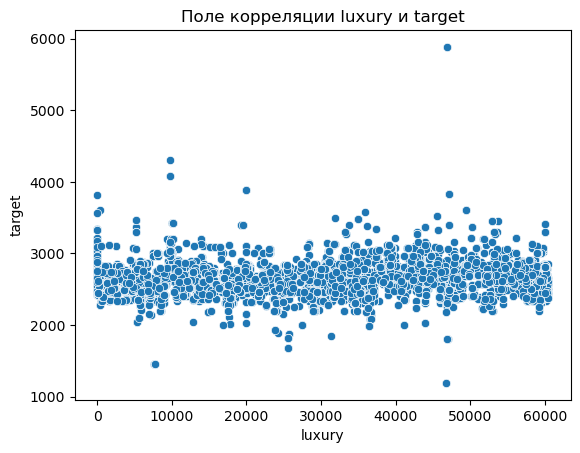

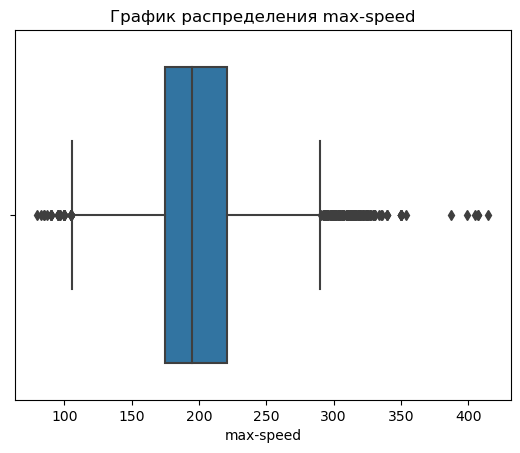

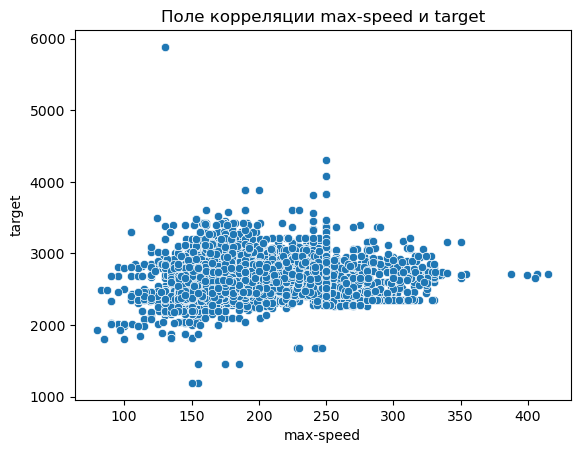

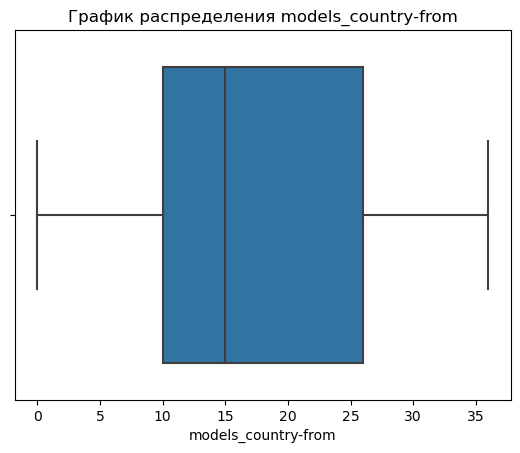

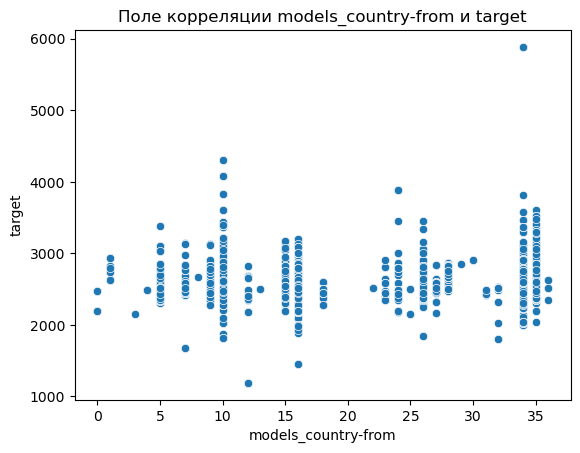

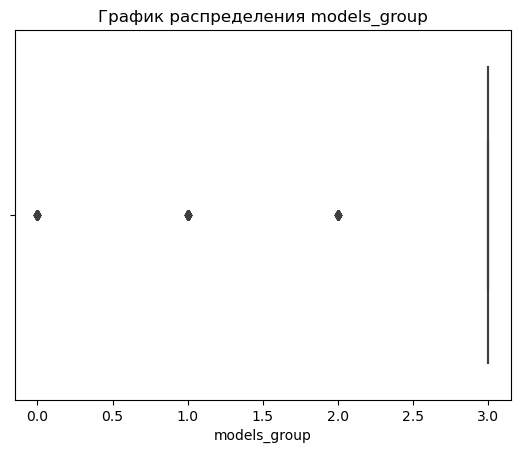

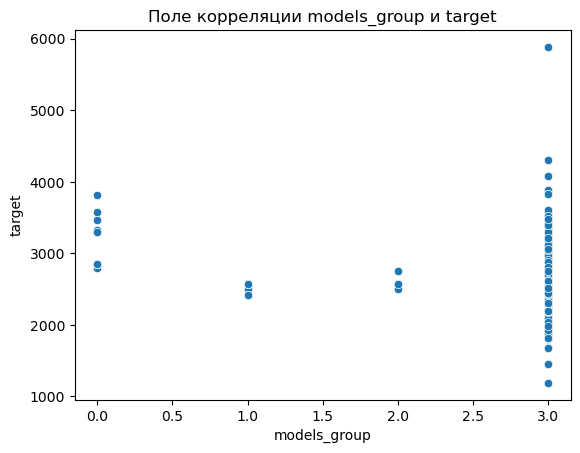

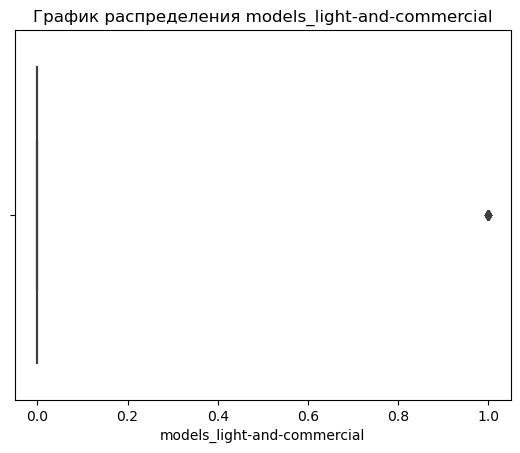

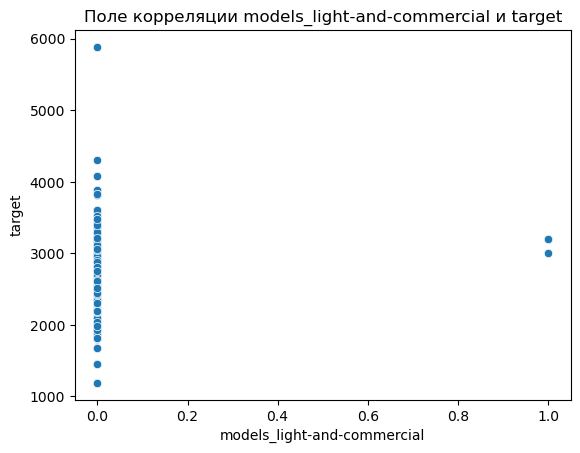

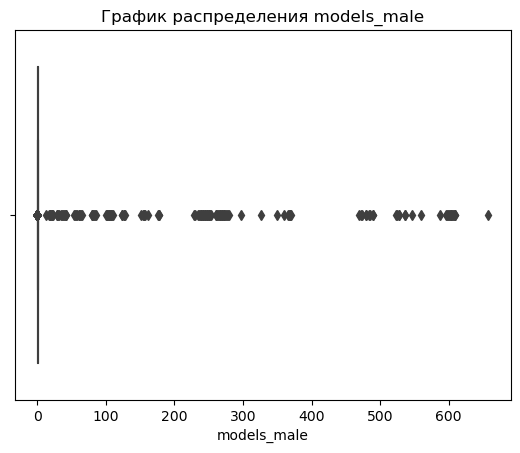

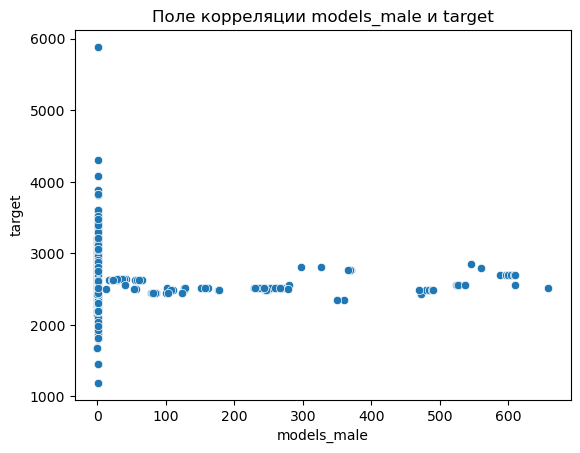

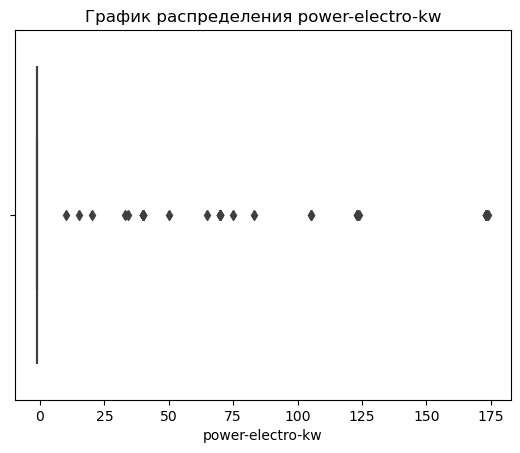

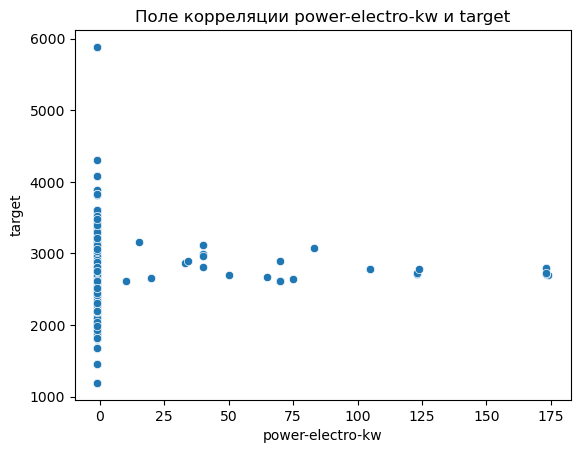

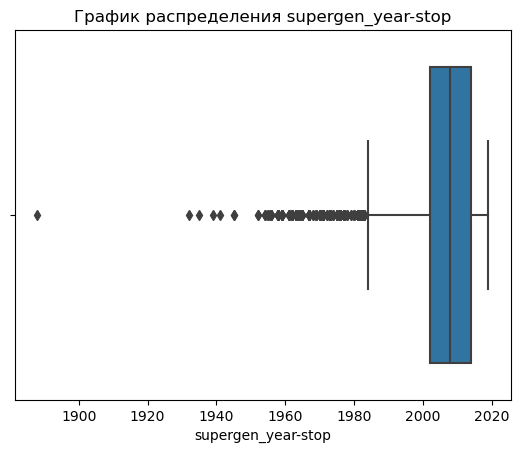

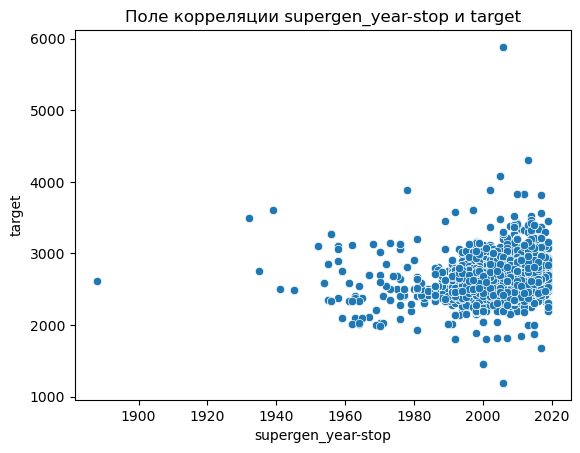

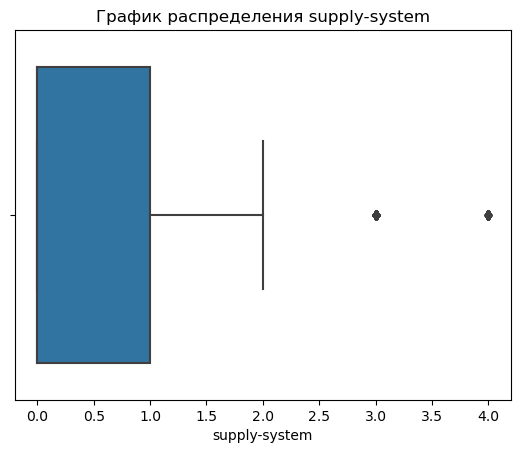

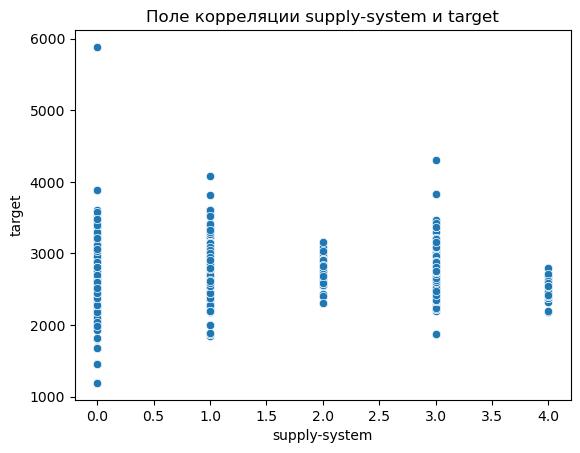

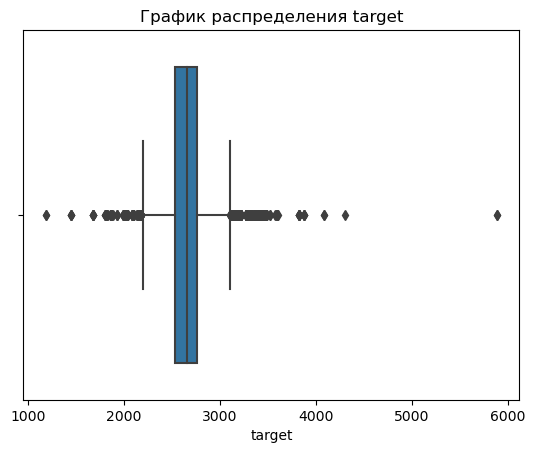

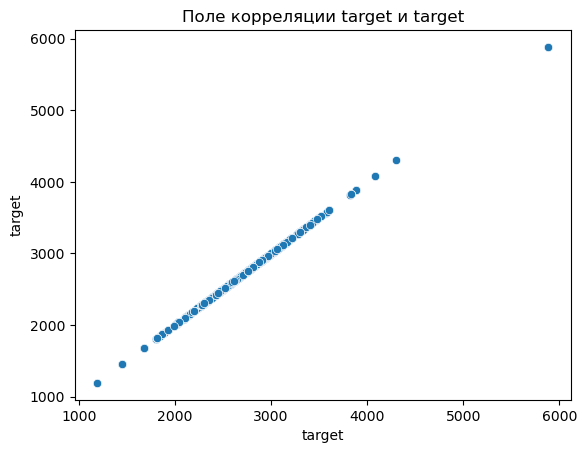

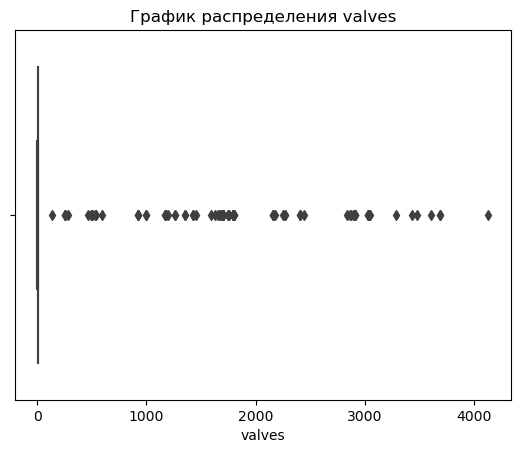

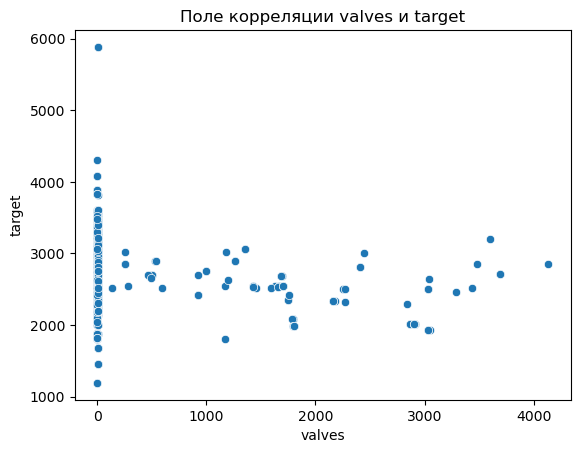

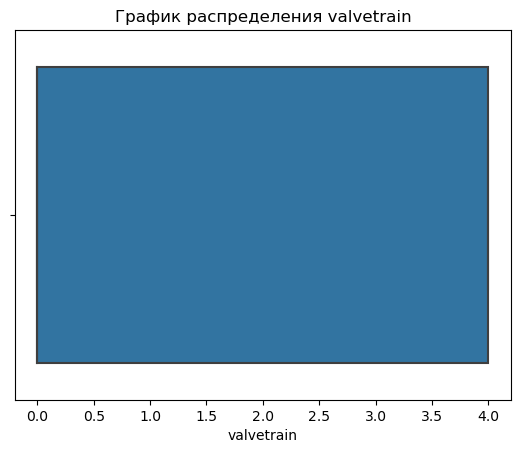

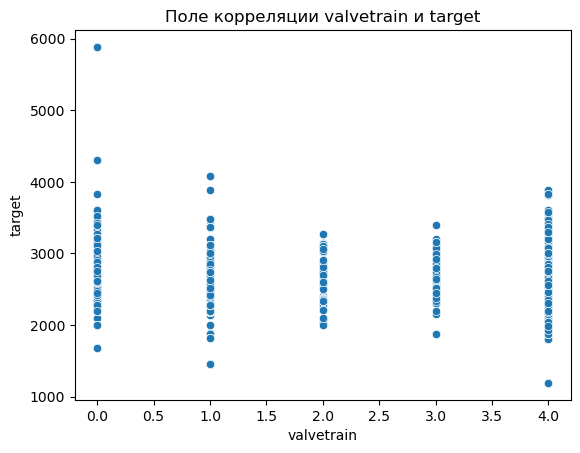

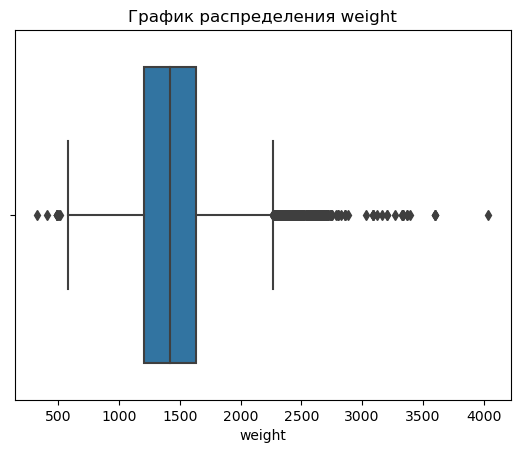

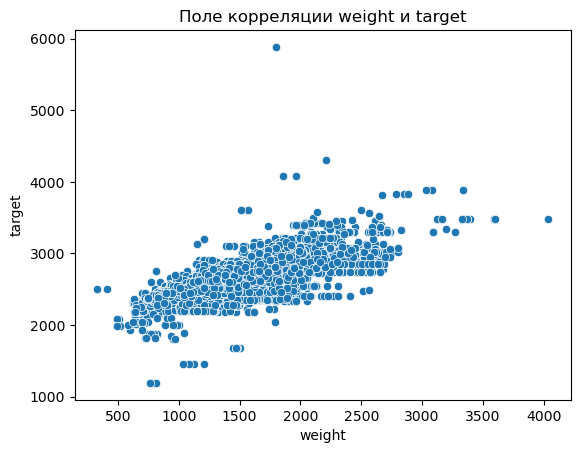

In [11]:
# Повторяем графики
for i in sorted(df_ready.columns):
    bp(df_ready, i)

In [12]:
df_ready

index  back-suspension  battery-capacity  charge-time  compression  \
0          2                3              -1.0        44872          8.0   
1          4                3              -1.0        55927         16.0   
2          5                0              -1.0        41405         10.3   
3          7                8              -1.0        22523         19.0   
4          8                8              -1.0        22100          9.6   
...      ...              ...               ...          ...          ...   
19019  61216                8              -1.0        12898         10.5   
19020  61222                3              -1.0        44295         17.0   
19021  61225                3              -1.0        38268          9.6   
19022  61226                3              -1.0         8958         10.0   
19023  61227                3              -1.0        20293          8.5   

       consumption-mixed  cylinders-order  cylinders-value  engine-feeding  \
0                   -1.0                3                7               4   
1                    4.2                0                4               5   
2                   -1.0                0                4               4   
3                   -1.0                0                4               8   
4                    6.0                0                4               2   
...                  ...              ...              ...             ...   
19019                6.1                0                4               4   
19020                7.1                0                6               5   
19021                5.8                0                4               2   
19022                9.3                0                4               4   
19023               -1.0                0                5               4   

       engine-start  ...  configurations_front-brake  \
0              1982  ...                           4   
1              2014  ...                           4   
2              2000  ...                           4   
3              2000  ...                           4   
4              2014  ...                           4   
...             ...  ...                         ...   
19019          2007  ...                           4   
19020          2005  ...                           4   
19021          2013  ...                           4   
19022          1991  ...                           4   
19023          2002  ...                           1   

       configurations_safety-rating  configurations_seats  \
0                                 2                    13   
1                                 2                    13   
2                                 2                    13   
3                                 1                    13   
4                                 2                    13   
...                             ...                   ...   
19019                             1                    13   
19020                             1                    13   
19021                             2                    13   
19022                             2                    13   
19023                             2                    13   

       configurations_tank-volume  supergen_year-stop  models_country-from  \
0                           108.0              1993.0                   34   
1                            55.0              2019.0                   35   
2                            55.0              2003.0                   10   
3                            62.0              2005.0                   10   
4                            45.0              2017.0                   10   
...                           ...                 ...                  ...   
19019                        52.0              2014.0                   10   
19020                        63.0              2010.0                   10   
19021                        65.0    

<strong>Всё равно удалено много элементов, но уже лучше. <br>Тогда эти же столбцы не войдут в модель регрессии</strong>

In [13]:
# На этом этапе те переменные, которые принимают дискретные целочисленные значения, заменяем на фиктивные
back_sus = pd.DataFrame(data=pd.get_dummies(df_ready['back-suspension'], drop_first=True, prefix="country", dtype='int32'))
back_sus.index = df_ready.index

#Распределение переменной compression выглядит как два облака вокруг значений 10 и 20, 
#поэтому лучше провести кластеризацию и заменить на фиктивную переменную 
#(обращая внимание на scatterplot можно заметить, что значение 15 тяготеет к значению 20)
df_ready['compression'] = np.where(df_ready['compression'] < 14, 10, 20)
compression = pd.DataFrame(data=pd.get_dummies(df_ready['compression'], drop_first=True, prefix="c_fb", dtype='int32'))
compression.index = df_ready.index

configurations_fb = pd.DataFrame(data=pd.get_dummies(df_ready['configurations_front-brake'], drop_first=True, prefix="c_fb", dtype='int32'))
configurations_fb.index = df_ready.index

configurations_sg = pd.DataFrame(data=pd.get_dummies(df_ready['configurations_safety-rating'], drop_first=True, prefix="c_sg", dtype='int32'))
configurations_sg.index = df_ready.index

config_sts = pd.DataFrame(data=pd.get_dummies(df_ready['configurations_seats'], drop_first=True, prefix="c_o", dtype='int32'))
config_sts.index = df_ready.index

cylinders_order = pd.DataFrame(data=pd.get_dummies(df_ready['cylinders-order'], drop_first=True, prefix="c_o", dtype='int32'))
cylinders_order.index = df_ready.index

cylinders_value = pd.DataFrame(data=pd.get_dummies(df_ready['cylinders-value'], drop_first=True, prefix="c_o", dtype='int32'))
cylinders_value.index = df_ready.index

engine_feeding = pd.DataFrame(data=pd.get_dummies(df_ready['engine-feeding'], drop_first=True, prefix="e_f", dtype='int32'))
engine_feeding.index = df_ready.index

engine_typ = pd.DataFrame(data=pd.get_dummies(df_ready['engine-type'], drop_first=True, prefix="e_t", dtype='int32'))
engine_typ.index = df_ready.index

gear_typ = pd.DataFrame(data=pd.get_dummies(df_ready['gear-type'], drop_first=True, prefix="g_t", dtype='int32'))
gear_typ.index = df_ready.index

model_country = pd.DataFrame(data=pd.get_dummies(df_ready['models_country-from'], drop_first=True, prefix="country", dtype='int32'))
model_country.index = df_ready.index

models_group = pd.DataFrame(data=pd.get_dummies(df_ready['models_group'], drop_first=True, prefix="m_g", dtype='int32'))
models_group.index = df_ready.index

supply_system = pd.DataFrame(data=pd.get_dummies(df_ready['supply-system'], drop_first=True, prefix="s_s", dtype='int32'))
supply_system.index = df_ready.index

valvetrain = pd.DataFrame(data=pd.get_dummies(df_ready['valvetrain'], drop_first=True, prefix="vt", dtype='int32'))
valvetrain.index = df_ready.index

df_ready = pd.concat([df_ready, back_sus, compression, configurations_fb, configurations_sg, config_sts, cylinders_order, cylinders_value, 
               engine_feeding, engine_typ, gear_typ, model_country, models_group, supply_system, valvetrain], axis=1).drop(
    ['back-suspension', 'compression', 'configurations_front-brake', 'configurations_safety-rating', 'configurations_seats', 
    'cylinders-order', 'cylinders-value', 'engine-feeding', 'engine-type', 'gear-type', 'models_country-from', 
    'models_group', 'supply-system', 'valvetrain'], axis=1)
df_ready

index  battery-capacity  charge-time  consumption-mixed  engine-start  \
0          2              -1.0        44872               -1.0          1982   
1          4              -1.0        55927                4.2          2014   
2          5              -1.0        41405               -1.0          2000   
3          7              -1.0        22523               -1.0          2000   
4          8              -1.0        22100                6.0          2014   
...      ...               ...          ...                ...           ...   
19019  61216              -1.0        12898                6.1          2007   
19020  61222              -1.0        44295                7.1          2005   
19021  61225              -1.0        38268                5.8          2013   
19022  61226              -1.0         8958                9.3          1991   
19023  61227              -1.0        20293               -1.0          2002   

       engine-stop  luxury  max-speed  power-electro-kw  valves  ...  m_g_2  \
0             1993   44289      217.0              -1.0    1354  ...      0   
1             2018   55481      193.0              -1.0       2  ...      0   
2             2003   40914      189.0              -1.0       0  ...      0   
3             2005   22118      185.0              -1.0       0  ...      0   
4             2017   21657      236.0              -1.0       2  ...      0   
...            ...     ...        ...               ...     ...  ...    ...   
19019         2011   12068      178.0              -1.0       2  ...      0   
19020         2008   43663      242.0              -1.0       2  ...      0   
19021         2015   37929      242.0              -1.0       2  ...      0   
19022         1999    8324      170.0              -1.0       2  ...      0   
19023         2004   19806      250.0              -1.0       2  ...      0   

       m_g_3  s_s_1  s_s_2  s_s_3  s_s_4  vt_1  vt_2  vt_3  vt_4  
0          1      0      0      0      0     0     0     0     0  
1          1      0      0      0      0     0     0     0     0  
2          1      1      0      0      0     1     0     0     0  
3          1      0      0      1      0     1     0     0     0  
4          1      0      0      1      0     0     0     0     0  
...      ...    ...    ...    ...    ...   ...   ...   ...   ...  
19019      1      1      0      0      0     0     0     0     0  
19020      1      0      0      1      0     0     0     0     1  
19021      1      0      0      1      0     0     0     0     0  
19022      1      0      0      0      0     1     0     0     0  
19023      1      0      0      1      0     0     0     0     0  

[19024 rows x 127 columns]

## Baseline

In [135]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from statsmodels.tools.tools import add_constant

In [136]:
# Разбиваем датасет на зависимые и независимые переменные, а также разбиваем его на тренировочную и тестовую выборки
# add_constant - добавляет свободный член в модель
X = add_constant(df_ready.drop(['target', 'index', 'battery-capacity', 'charge-time', 
                   'consumption-mixed', 'engine-start', 'models_male', 'power-electro-kw', 'valves'], axis=1))
y = df_ready[["target"]]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=42)


In [137]:
#Создаём линейную модель
reg_fst = sm.OLS(train_y, train_X).fit()

In [138]:
train_X

const  engine-stop  luxury  max-speed  weight  \
11848    1.0         2006   27164      180.0  1230.0   
8618     1.0         2015   35720      210.0  1488.0   
14283    1.0         2010   49759      250.0  1995.0   
15791    1.0         1981   11246      165.0  1055.0   
15094    1.0         2013   50901      250.0  1840.0   
...      ...          ...     ...        ...     ...   
11284    1.0         2005   23032      195.0  1930.0   
11964    1.0         2004    3258      240.0  1635.0   
5390     1.0         2009    9799      250.0  2010.0   
860      1.0         2002   36887      185.0  1222.0   
15795    1.0         2017   21156      204.0  1249.0   

       configurations_auto-premiere  configurations_back-wheel-base  \
11848                         27331                          1460.0   
8618                          36142                          1534.0   
14283                         50572                          1607.0   
15791                         11560                          1350.0   
15094                         50847                          1604.0   
...                             ...                             ...   
11284                         23665                          1520.0   
11964                          3048                          1528.0   
5390                          10458                          1606.0   
860                           37680                          1454.0   
15795                         21529                          1520.0   

       configurations_tank-volume  supergen_year-stop  \
11848                        55.0              2007.0   
8618                         60.0              2015.0   
14283                        90.0              2010.0   
15791                        60.0              1981.0   
15094                        80.0              2013.0   
...                           ...                 ...   
11284                        73.0              2006.0   
11964                        75.0              2004.0   
5390                         90.0              2009.0   
860                          62.0              2002.0   
15795                        50.0              2017.0   

       models_light-and-commercial  ...  m_g_2  m_g_3  s_s_1  s_s_2  s_s_3  \
11848                            0  ...      0      1      0      0      0   
8618                             0  ...      0      1      0      0      1   
14283                            0  ...      0      1      0      0      0   
15791                            0  ...      0      1      0      0      0   
15094                            0  ...      0      1      1      0      0   
...                            ...  ...    ...    ...    ...    ...    ...   
11284                            0  ...      0      1      1      0      0   
11964                            0  ...      0      1      1      0      0   
5390                             0  ...      0      1      1      0      0   
860                              0  ...      0      1      0      0      0   
15795                            0  ...      0      1      0      0      1   

       s_s_4  vt_1  vt_2  vt_3  vt_4  
11848      0     0     0     0     0  
8618       0     0     0     0     0  
14283      0     0     0     0     0  
15791      0     0     0     1     0  
15094      0     0     0     0     1  
...      ...   ...   ...   ...   ...  
11284      0     0     0     0     1  
11964      0     0     0     0     0  
5390       0     0     0     0     1  
860        0     0     0     0     0  
15795      0     0     0     0     0  

[12746 rows x 119 columns]

In [139]:
#Выводим коэффициенты
reg_fst.params

const          523.042958
engine-stop     -0.008823
luxury          -0.000066
max-speed        0.479338
weight           0.201871
                  ...    
s_s_4           21.540553
vt_1            -2.683265
vt_2            50.357838
vt_3             7.813540
vt_4            -7.774262
Length: 119, dtype: float64

In [140]:
#Таблица pvalues
crit = pd.DataFrame(reg_fst.pvalues.sort_values()).reset_index()
crit

index              0
0                             g_t_2  1.475900e-187
1                            weight  1.785562e-136
2    configurations_back-wheel-base  1.957099e-136
3                             g_t_1   2.962622e-64
4                         country_1   8.905402e-57
..                              ...            ...
114                          c_sg_2   8.218518e-01
115                          c_o_20   9.041028e-01
116                          c_o_31   9.247282e-01
117                          c_sg_1   9.254975e-01
118                      country_13   9.542849e-01

[119 rows x 2 columns]

In [141]:
#В этот список добавляем те pvalues, которые больше 0,05 - это свидетельствует о незначимости переменной.
[x for x in list(crit.iloc[:, 1]) if x > 0.05]

[0.052984957757456985,
 0.05626067943105278,
 0.06105694905744529,
 0.06356487742801585,
 0.0637142265125205,
 0.0707217121898607,
 0.07203364985696911,
 0.07893950419401544,
 0.0882688130535221,
 0.09157371363127581,
 0.09370195727935597,
 0.10079927864813422,
 0.10119939423729064,
 0.10405714967301842,
 0.10452609775143795,
 0.11754105299939759,
 0.13191487897164983,
 0.13201000655910122,
 0.13552173595304198,
 0.13918919925122264,
 0.14801107474272587,
 0.15982552755823815,
 0.17196416602261247,
 0.18805072192338396,
 0.20370789763730487,
 0.20937804964851914,
 0.22598783428341793,
 0.25038269439476374,
 0.2574473741379342,
 0.2982875996787787,
 0.32803802388840797,
 0.33349654590372046,
 0.3512142402169629,
 0.3609673262764963,
 0.3665490757148605,
 0.3681065781255298,
 0.37678384685583455,
 0.37696798120929376,
 0.3772337546093648,
 0.4007453381113365,
 0.44543493282720537,
 0.478985324329927,
 0.4905241333895345,
 0.4996627998770904,
 0.5182934324339806,
 0.6180766216638273,
 0.6

In [142]:
#А в этот - соответствующие незначимые переменные
[y for y in list(crit.iloc[(crit.shape[0]-len([x for x in list(crit.iloc[:, 1]) if x > 0.05])):, 0])]

['country_5',
 'country_10',
 'e_f_7',
 'country_35',
 'c_o_15',
 'country_7',
 'e_f_3',
 's_s_4',
 'c_o_21',
 'c_o_2',
 'country_34',
 'c_o_2',
 'e_f_2',
 'country_31',
 'country_24',
 'country_22',
 'e_t_2',
 'e_t_4',
 'country_8',
 'country_16',
 'country_30',
 'vt_3',
 'c_o_13',
 'const',
 'c_o_3',
 'country_23',
 'c_o_25',
 'country_18',
 'country_7',
 'e_t_3',
 'country_29',
 'country_12',
 'c_o_4',
 'country_26',
 'country_4',
 'country_15',
 'supergen_year-stop',
 's_s_2',
 'vt_1',
 'c_o_27',
 'engine-stop',
 'c_o_34',
 's_s_3',
 'models_light-and-commercial',
 'country_2',
 'country_32',
 'c_o_17',
 'country_27',
 'country_25',
 'luxury',
 'c_o_32',
 'c_sg_2',
 'c_o_20',
 'c_o_31',
 'c_sg_1',
 'country_13']

In [143]:
#Максимальный pvalues
reg_fst.pvalues.max()

0.9542848893537346

In [144]:
# впоследствие была выведена сводная информация по модели, а здесь - коэффициент детерминации
reg_fst.rsquared

0.7280099855199467

In [145]:
#Среднеквадратическая ошибка
mean_squared_error(reg_fst.predict(train_X), train_y)

10629.6396540346

In [146]:
#Она же, но для проверочной выборки
mean_squared_error(reg_fst.predict(test_X), test_y)

9576.30923675903

In [147]:
#Критическое значение F (для проверки значимости, не использовалось)
f_crit = st.f.ppf(0.05, X.shape[1], y.shape[0])
f_crit

0.7962693811723338

In [148]:
# Сводная информация по регрессионной модели
reg_fst.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     296.6
Date:                Wed, 05 Mar 2025   Prob (F-statistic):               0.00
Time:                        22:14:05   Log-Likelihood:                -77172.
No. Observations:               12746   AIC:                         1.546e+05
Df Residuals:                   12631   BIC:                         1.554e+05
Df Model:                         114                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                            523.0430    397.317      1.316      0.188    -255.758    1301.844
engine-stop                       -0.0088      0.012     -0.763      0.445      -0.031       0.014
luxury                         -6.648e-05      0.000     -0.453      0.651      -0.000       0.000
max-speed                          0.4793      0.052      9.299      0.000       0.378       0.580
weight                             0.2019      0.008     25.173      0.000       0.186       0.218
configurations_auto-premiere       0.0006      0.000      3.793      0.000       0.000       0.001
configurations_back-wheel-base     0.6551      0.026     25.169      0.000       0.604       0.706
configurations_tank-volume         2.3208      0.155     14.993      0.000       2.017       2.624
supergen_year-stop                 0.1826      0.207      0.884      0.377      -0.222       0.588
models_light-and-commercial       28.8035     42.669      0.675      0.500     -54.835     112.442
country_1                        117.7088      7.376     15.959      0.000     103.251     132.167
country_2                         18.5917     28.780      0.646      0.518     -37.821      75.004
country_3                         34.5614      4.443      7.778      0.000      25.852      43.271
country_4                        144.7367     12.971     11.158      0.000     119.312     170.162
country_5                         67.7903     25.599      2.648      0.008      17.613     117.968
country_6                        100.7258      7.422     13.571      0.000      86.177     115.275
country_7                        -28.9935     16.041     -1.807      0.071     -60.437       2.450
country_8                         27.3213      5.246      5.208      0.000      17.038      37.605
country_9                         34.8237      6.891      5.054      0.000      21.317      48.331
country_10                        79.7810      9.974      7.999      0.000      60.231      99.331
c_fb_20                           50.2937     13.991      3.595      0.000      22.870      77.718
c_fb_2                            44.3397     13.296      3.335      0.001      18.278      70.401
c_fb_3                          -100.6101     28.880     -3.484      0.000    -157.220     -44.000
c_fb_4                            -8.1372      2.641     -3.081      0.002     -13.315      -2.960
c_sg_1                             1.2733     13.616      0.094      0.925     -25.416      27.963
c_sg_2                             3.0202     13.413      0.225      0.822     -23.272      29.312
c_o_4                           -260.3278     17.764    -14.655      0.000    -295.147    -225.508
c_o_5                           -145.5914     72.477     -2.009      0.045    -287.657      -3.526
c_o_6         

<strong>Готово</strong>
<br>Что было сделано:
<i><br>1. Исключены значения -1 по некоторым столбцам (столбцы, по которым проверка не проводилась, озвучены ранее)
<br>2. Часть столбцов, принимающих дискретные значения переведены в фиктивные переменные
<br>3. Столбец compression, имеющий 2 модальных значения разделён по условию и переведён в фиктивную переменную</i>
<br>Мне не понравилось, что остаётся много незначимых переменных, я решил от них избавиться (MSE при этом увеличится). 
<br>По идее, удалять надо по одной, для которой pvalue максимален, но это слишком усложнит работу, поэтому убирался сразу весь список, полученный ранее

In [149]:
X_new = add_constant(df_ready.drop(set(['target', 'index', 'battery-capacity', 'charge-time', 'consumption-mixed', 'engine-start', 
                        'models_male', 'power-electro-kw', 'valves','country_5', 'country_10', 'e_f_7', 'country_35', 
                           'c_o_15', 'country_7', 'e_f_3', 's_s_4', 'c_o_21', 'c_o_2', 'country_34', 'e_f_2', 
                           'country_31', 'country_24', 'country_22', 'e_t_2', 'e_t_4', 'country_8', 'country_16', 
                           'country_30', 'vt_3', 'c_o_13', 'c_o_3', 'country_23', 'c_o_25', 'country_18', 'country_7', 
                           'e_t_3', 'country_29', 'country_12', 'c_o_4', 'country_26', 'country_4', 'country_15', 
                           'supergen_year-stop', 's_s_2', 'vt_1', 'c_o_27', 'engine-stop', 'c_o_34', 's_s_3', 
                           'models_light-and-commercial', 'country_2', 'country_32', 'c_o_17', 'country_27', 'country_25', 
                           'luxury', 'c_o_32', 'c_sg_2', 'c_o_20', 'c_o_31', 'c_sg_1', 'country_13']), axis=1))
y = df_ready[["target"]]
train_X, test_X, train_y, test_y = train_test_split(X_new, y, test_size=0.33, random_state=42)

In [150]:
reg_scd = sm.OLS(y, X_new).fit()

In [151]:
reg_scd.params

const                             1166.199767
max-speed                            0.232576
weight                               0.270267
configurations_auto-premiere         0.000519
configurations_back-wheel-base       0.617546
configurations_tank-volume           2.190963
country_1                           71.236887
country_3                           10.383021
country_6                           99.601929
country_9                            1.464759
c_fb_20                             16.216566
c_fb_2                              29.753824
c_fb_3                            -142.137417
c_fb_4                              -5.941233
c_o_5                              -80.709220
c_o_6                             -215.579281
c_o_7                             -195.440161
c_o_8                              -57.365216
c_o_9                              -12.699603
c_o_14                             108.053801
c_o_16                             340.906825
c_o_18                            

In [152]:
crit_new = pd.DataFrame(reg_scd.pvalues.sort_values()).reset_index()
crit_new

index              0
0                            const   0.000000e+00
1                           weight   0.000000e+00
2                            g_t_2  4.911181e-256
3   configurations_back-wheel-base  6.649758e-220
4                            g_t_1  5.817513e-173
5                            c_o_8  3.840804e-101
6       configurations_tank-volume   3.196382e-83
7                        country_6   6.208362e-70
8                            c_o_1   5.511822e-56
9                        country_9   9.143428e-54
10                          c_o_16   1.302010e-50
11                          c_o_23   8.639009e-39
12                       country_1   2.952707e-36
13                          c_o_24   5.197035e-33
14                          c_o_35   1.595449e-27
15                           c_o_8   3.680770e-23
16    configurations_auto-premiere   6.896559e-23
17                           c_o_6   6.999981e-22
18                          c_o_18   2.891557e-17
19                           c_o_7   1.528570e-15
20                          c_o_14   4.739421e-13
21                          c_o_19   5.421903e-12
22                          c_fb_3   6.367127e-11
23                           s_s_1   7.113672e-11
24                            vt_2   1.538394e-10
25                           c_o_7   1.805198e-10
26                       max-speed   4.524221e-10
27                           c_o_5   1.214430e-09
28                          c_o_28   1.162511e-08
29                       country_3   7.613711e-07
30                           e_f_4   8.233573e-07
31                            vt_4   2.625500e-06
32                           m_g_3   7.478386e-06
33                           m_g_1   7.665907e-06
34                           e_f_6   1.330553e-05
35                           e_f_8   1.528461e-04
36                          c_o_22   7.599278e-04
37                      country_36   7.608030e-04
38                           e_f_1   2.854620e-03
39                          c_fb_2   3.351005e-03
40                      country_28   3.623663e-03
41                          c_o_30   3.741499e-03
42                          c_fb_4   6.469702e-03
43                           m_g_2   1.150108e-02
44                          c_o_26   1.512316e-02
45                       country_3   1.580804e-02
46                       country_1   1.941049e-02
47                           c_o_9   2.116515e-02
48                           e_f_5   2.429948e-02
49                           c_o_9   2.710495e-02
50                         c_fb_20   4.777211e-02
51                           c_o_6   1.010947e-01
52                           c_o_6   2.048615e-01
53                           c_o_5   3.004889e-01
54                           c_o_5   3.546585e-01
55                       country_9   7.519788e-01
56                          c_o_10   7.717173e-01

In [153]:
[x for x in list(crit_new.iloc[:, 1]) if x > 0.05]

[0.10109473036184295,
 0.20486153382789488,
 0.30048893958711853,
 0.35465853370483036,
 0.7519788422452036,
 0.771717285336102]

In [154]:
[y for y in list(crit_new.iloc[(crit_new.shape[0]-len([x for x in list(crit_new.iloc[:, 1]) if x > 0.05])):, 0])]

['c_o_6', 'c_o_6', 'c_o_5', 'c_o_5', 'country_9', 'c_o_10']

In [155]:
reg_scd.rsquared

0.6907757395904937

In [156]:
mean_squared_error(reg_scd.predict(train_X), train_y)

12459.026034056027

In [157]:
mean_squared_error(reg_scd.predict(test_X), test_y)

11105.084646534664

In [158]:
reg_scd.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     756.6
Date:                Wed, 05 Mar 2025   Prob (F-statistic):               0.00
Time:                        22:14:05   Log-Likelihood:            -1.1635e+05
No. Observations:               19024   AIC:                         2.328e+05
Df Residuals:                   18967   BIC:                         2.333e+05
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           1166.1998     28.721     40.604      0.000    1109.904    1222.496
max-speed                          0.2326      0.037      6.238      0.000       0.159       0.306
weight                             0.2703      0.006     45.160      0.000       0.259       0.282
configurations_auto-premiere       0.0005   5.26e-05      9.862      0.000       0.000       0.001
configurations_back-wheel-base     0.6175      0.019     32.077      0.000       0.580       0.655
configurations_tank-volume         2.1910      0.113     19.423      0.000       1.970       2.412
country_1                         71.2369      5.654     12.600      0.000      60.155      82.319
country_3                         10.3830      2.099      4.947      0.000       6.269      14.497
country_6                         99.6019      5.611     17.751      0.000      88.604     110.600
country_9                          1.4648      4.635      0.316      0.752      -7.620      10.549
c_fb_20                           16.2166      8.192      1.980      0.048       0.159      32.274
c_fb_2                            29.7538     10.141      2.934      0.003       9.876      49.632
c_fb_3                          -142.1374     21.738     -6.539      0.000    -184.746     -99.529
c_fb_4                            -5.9412      2.182     -2.723      0.006     -10.217      -1.665
c_o_5                            -80.7092     77.949     -1.035      0.300    -233.496      72.077
c_o_6                           -215.5793     22.397     -9.626      0.000    -259.479    -171.680
c_o_7                           -195.4402     30.631     -6.381      0.000    -255.479    -135.402
c_o_8                            -57.3652      2.671    -21.480      0.000     -62.600     -52.131
c_o_9                            -12.6996      5.746     -2.210      0.027     -23.962      -1.437
c_o_14                           108.0538     14.929      7.238      0.000      78.791     137.317
c_o_16                           340.9068     22.717     15.006      0.000     296.379     385.435
c_o_18                           249.7659     29.527      8.459      0.000     191.891     307.641
c_o_19                           -74.9875     10.870     -6.898      0.000     -96.294     -53.681
c_o_22                            80.9482     24.038      3.368      0.001      33.832     128.064
c_o_23                           331.7005     25.406     13.056      0.000     281.902     381.499
c_o_24                           240.0109     20.015     11.991      0.000     200.779     279.243
c_o_26                           134.1099     55.198      2.430      0.015      25.918     242.302
c_o_28                          -169.1870     29.642     -5.708      0.000    -227.288    -111.086
c_o_30        

<strong>Ещё раз убираем незначимые переменные</strong>

In [159]:
X_new = add_constant(df_ready.drop(set(['target', 'index', 'battery-capacity', 'charge-time', 'consumption-mixed', 'engine-start', 
                        'models_male', 'power-electro-kw', 'valves','country_5', 'country_10', 'e_f_7', 'country_35', 
                           'c_o_15', 'country_7', 'e_f_3', 's_s_4', 'c_o_21', 'c_o_2', 'country_34', 'e_f_2', 
                           'country_31', 'country_24', 'country_22', 'e_t_2', 'e_t_4', 'country_8', 'country_16', 
                           'country_30', 'vt_3', 'c_o_13', 'c_o_3', 'country_23', 'c_o_25', 'country_18', 'country_7', 
                           'e_t_3', 'country_29', 'country_12', 'c_o_4', 'country_26', 'country_4', 'country_15', 
                           'supergen_year-stop', 's_s_2', 'vt_1', 'c_o_27', 'engine-stop', 'c_o_34', 's_s_3', 
                           'models_light-and-commercial', 'country_2', 'country_32', 'c_o_17', 'country_27', 'country_25', 
                           'luxury', 'c_o_32', 'c_sg_2', 'c_o_20', 'c_o_31', 'c_sg_1', 'country_13', 'c_o_6', 
                           'c_o_6', 'c_o_5', 'c_o_5', 'country_9', 'c_o_10']), axis=1))
y = df_ready[["target"]]
train_X, test_X, train_y, test_y = train_test_split(X_new, y, test_size=0.33, random_state=42)

In [160]:
reg_trd = sm.OLS(y, X_new).fit()

In [161]:
reg_trd.params

const                             1193.517863
max-speed                            0.209026
weight                               0.259164
configurations_auto-premiere         0.000301
configurations_back-wheel-base       0.616046
configurations_tank-volume           2.424310
country_1                           65.520291
country_3                            5.858459
country_6                           92.999713
c_fb_20                             13.997877
c_fb_2                              25.969952
c_fb_3                            -121.542009
c_fb_4                              -2.464436
c_o_7                             -194.406336
c_o_8                              -55.816079
c_o_9                              -13.901141
c_o_14                             106.848247
c_o_16                             336.035373
c_o_18                             242.535056
c_o_19                             -74.436860
c_o_22                              74.688477
c_o_23                            

In [162]:
crit_new = pd.DataFrame(reg_trd.pvalues.sort_values()).reset_index()
crit_new

index              0
0                            const   0.000000e+00
1                           weight   0.000000e+00
2                            g_t_2  1.085147e-257
3   configurations_back-wheel-base  3.255281e-219
4                            g_t_1  2.446143e-196
5       configurations_tank-volume  1.840178e-104
6                            c_o_8   3.203166e-94
7                        country_6   5.797965e-61
8                            c_o_1   2.447782e-59
9                           c_o_16   2.531979e-48
10                          c_o_23   1.072075e-36
11                          c_o_24   4.088958e-35
12                       country_1   1.112874e-30
13                          c_o_35   6.648504e-26
14                           c_o_8   1.982317e-22
15                           c_o_7   4.171304e-17
16                          c_o_18   4.402065e-16
17                          c_o_14   1.425870e-12
18                           s_s_1   1.061117e-11
19                          c_o_19   1.227385e-11
20                            vt_2   2.410732e-11
21                           c_o_9   2.302620e-10
22                           c_o_7   3.231596e-10
23                       max-speed   2.298836e-09
24    configurations_auto-premiere   4.321997e-09
25                          c_fb_3   4.377357e-09
26                          c_o_28   1.228509e-08
27                           e_f_4   1.397372e-07
28                           m_g_3   3.131790e-07
29                           m_g_1   5.320226e-07
30                           e_f_8   4.141562e-05
31                           e_f_6   1.025030e-04
32                            vt_4   1.277102e-04
33                           e_f_1   1.348568e-04
34                          c_o_22   2.098408e-03
35                           m_g_2   2.116160e-03
36                      country_36   2.446879e-03
37                       country_3   4.188370e-03
38                          c_o_30   5.691201e-03
39                          c_fb_2   1.078654e-02
40                       country_3   1.465238e-02
41                           c_o_9   1.624706e-02
42                          c_o_26   1.691213e-02
43                       country_1   1.878966e-02
44                         c_fb_20   9.065033e-02
45                           e_f_5   1.178776e-01
46                          c_fb_4   2.593291e-01
47                      country_28   3.366326e-01

In [163]:
[x for x in list(crit_new.iloc[:, 1]) if x > 0.05]

[0.09065032504795817,
 0.11787764363807614,
 0.25932913351549636,
 0.33663255581934126]

In [164]:
[y for y in list(crit_new.iloc[(crit_new.shape[0]-len([x for x in list(crit_new.iloc[:, 1]) if x > 0.05])):, 0])]

['c_fb_20', 'e_f_5', 'c_fb_4', 'country_28']

In [165]:
reg_trd.rsquared

0.6843077820240095

In [166]:
mean_squared_error(reg_trd.predict(train_X), train_y)

12695.382425884542

In [167]:
mean_squared_error(reg_trd.predict(test_X), test_y)

11386.591539619802

In [168]:
reg_trd.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     875.2
Date:                Wed, 05 Mar 2025   Prob (F-statistic):               0.00
Time:                        22:14:06   Log-Likelihood:            -1.1654e+05
No. Observations:               19024   AIC:                         2.332e+05
Df Residuals:                   18976   BIC:                         2.336e+05
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           1193.5179     28.944     41.235      0.000    1136.784    1250.251
max-speed                          0.2090      0.035      5.978      0.000       0.140       0.278
weight                             0.2592      0.006     44.039      0.000       0.248       0.271
configurations_auto-premiere       0.0003   5.12e-05      5.874      0.000       0.000       0.000
configurations_back-wheel-base     0.6160      0.019     32.025      0.000       0.578       0.654
configurations_tank-volume         2.4243      0.111     21.841      0.000       2.207       2.642
country_1                         65.5203      5.680     11.535      0.000      54.387      76.654
country_3                          5.8585      2.046      2.864      0.004       1.849       9.868
country_6                         92.9997      5.626     16.532      0.000      81.973     104.026
c_fb_20                           13.9979      8.273      1.692      0.091      -2.217      30.213
c_fb_2                            25.9700     10.185      2.550      0.011       6.006      45.934
c_fb_3                          -121.5420     20.699     -5.872      0.000    -162.113     -80.971
c_fb_4                            -2.4644      2.185     -1.128      0.259      -6.747       1.818
c_o_7                           -194.4063     30.904     -6.291      0.000    -254.981    -133.831
c_o_8                            -55.8161      2.695    -20.708      0.000     -61.099     -50.533
c_o_9                            -13.9011      5.784     -2.404      0.016     -25.238      -2.565
c_o_14                           106.8482     15.078      7.086      0.000      77.294     136.403
c_o_16                           336.0354     22.940     14.648      0.000     291.071     381.000
c_o_18                           242.5351     29.817      8.134      0.000     184.091     300.979
c_o_19                           -74.4369     10.977     -6.781      0.000     -95.953     -52.921
c_o_22                            74.6885     24.278      3.076      0.002      27.101     122.276
c_o_23                           325.3715     25.660     12.680      0.000     275.076     375.667
c_o_24                           250.2653     20.200     12.389      0.000     210.671     289.860
c_o_26                           133.1906     55.756      2.389      0.017      23.904     242.477
c_o_28                          -170.6153     29.942     -5.698      0.000    -229.304    -111.927
c_o_30                           -67.6799     24.474     -2.765      0.006    -115.651     -19.709
c_o_35                           204.2904     19.382     10.540      0.000     166.300     242.281
c_o_1                            -90.9708      5.581    -16.301      0.000    -101.909     -80.032
c_o_7         

<strong>И ещё раз</strong>

In [169]:
X_new = add_constant(df_ready.drop(set(['target', 'index', 'battery-capacity', 'charge-time', 'consumption-mixed', 'engine-start', 
                        'models_male', 'power-electro-kw', 'valves','country_5', 'country_10', 'e_f_7', 'country_35', 
                           'c_o_15', 'country_7', 'e_f_3', 's_s_4', 'c_o_21', 'c_o_2', 'country_34', 'e_f_2', 
                           'country_31', 'country_24', 'country_22', 'e_t_2', 'e_t_4', 'country_8', 'country_16', 
                           'country_30', 'vt_3', 'c_o_13', 'c_o_3', 'country_23', 'c_o_25', 'country_18', 'country_7', 
                           'e_t_3', 'country_29', 'country_12', 'c_o_4', 'country_26', 'country_4', 'country_15', 
                           'supergen_year-stop', 's_s_2', 'vt_1', 'c_o_27', 'engine-stop', 'c_o_34', 's_s_3', 
                           'models_light-and-commercial', 'country_2', 'country_32', 'c_o_17', 'country_27', 'country_25', 
                           'luxury', 'c_o_32', 'c_sg_2', 'c_o_20', 'c_o_31', 'c_sg_1', 'country_13', 'c_o_6', 
                           'c_o_6', 'c_o_5', 'c_o_5', 'country_9', 'c_o_10', 'c_fb_20', 'e_f_5', 'c_fb_4', 'country_28']), axis=1))
y = df_ready[["target"]]
train_X, test_X, train_y, test_y = train_test_split(X_new, y, test_size=0.33, random_state=42)

In [170]:
reg_fr = sm.OLS(y, X_new).fit()

In [171]:
reg_fr.params

const                             1198.894934
max-speed                            0.202331
weight                               0.259164
configurations_auto-premiere         0.000294
configurations_back-wheel-base       0.611565
configurations_tank-volume           2.445922
country_1                           66.054835
country_3                            6.135560
country_6                           92.956007
c_fb_2                              26.210797
c_fb_3                            -117.904515
c_o_7                             -193.281311
c_o_8                              -55.903842
c_o_9                              -13.785006
c_o_14                             107.083731
c_o_16                             335.343694
c_o_18                             243.108745
c_o_19                             -74.508889
c_o_22                              73.634371
c_o_23                             324.616854
c_o_24                             250.135112
c_o_26                            

In [172]:
crit_new = pd.DataFrame(reg_fr.pvalues.sort_values()).reset_index()
crit_new

index              0
0                            const   0.000000e+00
1                           weight   0.000000e+00
2                            g_t_2  2.403000e-258
3   configurations_back-wheel-base  2.422573e-226
4                            g_t_1  2.090134e-199
5       configurations_tank-volume  4.928324e-109
6                            c_o_8   8.474017e-95
7                        country_6   6.142608e-61
8                            c_o_1   5.029404e-60
9                           c_o_16   3.631395e-48
10                          c_o_23   1.503054e-36
11                          c_o_24   4.019956e-35
12                       country_1   2.741890e-31
13                          c_o_35   7.721202e-26
14                           c_o_8   1.578153e-22
15                           c_o_7   1.472156e-17
16                          c_o_18   3.726913e-16
17                          c_o_14   1.215812e-12
18                          c_o_19   1.159408e-11
19                           s_s_1   1.598066e-11
20                            vt_2   1.919702e-11
21                           e_f_4   3.577017e-11
22                           c_o_9   1.421562e-10
23                           c_o_7   4.001162e-10
24                       max-speed   2.903525e-09
25    configurations_auto-premiere   5.112619e-09
26                          c_fb_3   1.008062e-08
27                          c_o_28   1.185630e-08
28                           e_f_6   1.310616e-07
29                           m_g_3   3.191596e-07
30                           m_g_1   4.625621e-07
31                           e_f_8   1.183526e-05
32                           e_f_1   1.004431e-04
33                            vt_4   1.574987e-04
34                           m_g_2   1.988215e-03
35                      country_36   2.101988e-03
36                          c_o_22   2.402188e-03
37                       country_3   2.570509e-03
38                          c_o_30   6.185136e-03
39                          c_fb_2   9.603789e-03
40                       country_3   1.476559e-02
41                          c_o_26   1.602251e-02
42                           c_o_9   1.706511e-02
43                       country_1   1.972139e-02

In [173]:
[x for x in list(crit_new.iloc[:, 1]) if x > 0.05]

[]

In [174]:
[y for y in list(crit_new.iloc[(crit_new.shape[0]-len([x for x in list(crit_new.iloc[:, 1]) if x > 0.05])):, 0])]

[]

In [175]:
reg_fr.rsquared

0.6842244557364073

In [176]:
mean_squared_error(reg_fr.predict(train_X), train_y)

12702.667887372407

In [177]:
mean_squared_error(reg_fr.predict(test_X), test_y)

11381.608844797114

In [178]:
reg_fr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     956.4
Date:                Wed, 05 Mar 2025   Prob (F-statistic):               0.00
Time:                        22:14:07   Log-Likelihood:            -1.1655e+05
No. Observations:               19024   AIC:                         2.332e+05
Df Residuals:                   18980   BIC:                         2.335e+05
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           1198.8949     28.495     42.073      0.000    1143.041    1254.748
max-speed                          0.2023      0.034      5.940      0.000       0.136       0.269
weight                             0.2592      0.006     44.576      0.000       0.248       0.271
configurations_auto-premiere       0.0003   5.03e-05      5.846      0.000       0.000       0.000
configurations_back-wheel-base     0.6116      0.019     32.560      0.000       0.575       0.648
configurations_tank-volume         2.4459      0.110     22.329      0.000       2.231       2.661
country_1                         66.0548      5.667     11.656      0.000      54.947      77.163
country_3                          6.1356      2.035      3.015      0.003       2.147      10.124
country_6                         92.9560      5.624     16.528      0.000      81.932     103.980
c_fb_2                            26.2108     10.120      2.590      0.010       6.375      46.047
c_fb_3                          -117.9045     20.570     -5.732      0.000    -158.223     -77.586
c_o_7                           -193.2813     30.889     -6.257      0.000    -253.826    -132.736
c_o_8                            -55.9038      2.691    -20.774      0.000     -61.179     -50.629
c_o_9                            -13.7850      5.779     -2.386      0.017     -25.112      -2.458
c_o_14                           107.0837     15.064      7.108      0.000      77.556     136.611
c_o_16                           335.3437     22.932     14.624      0.000     290.396     380.292
c_o_18                           243.1087     29.813      8.154      0.000     184.672     301.546
c_o_19                           -74.5089     10.974     -6.789      0.000     -96.020     -52.998
c_o_22                            73.6344     24.255      3.036      0.002      26.092     121.177
c_o_23                           324.6169     25.654     12.654      0.000     274.332     374.902
c_o_24                           250.1351     20.188     12.391      0.000     210.566     289.705
c_o_26                           134.2493     55.737      2.409      0.016      25.000     243.499
c_o_28                          -170.7995     29.942     -5.704      0.000    -229.489    -112.110
c_o_30                           -66.9466     24.450     -2.738      0.006    -114.871     -19.023
c_o_35                           203.9787     19.378     10.526      0.000     165.995     241.962
c_o_1                            -91.3694      5.572    -16.399      0.000    -102.290     -80.448
c_o_7                            -33.8622      3.966     -8.538      0.000     -41.636     -26.088
c_o_8                           -168.0496     17.186     -9.778      0.000    -201.736    -134.363
c_o_9         

<strong>Готово!</strong>
<br>Конечно, MSE в четвёртой модели больше, чем в первой, но все переменные здесь значимы